# Reaizado por:

**Cesar Augusto Saenz Jimenez**

**Ricardo Alejadro Giraldo**

**Laura Manuela Caro**

<h1 style="color: green">Clustering</h1>

In [1]:
# Cargue las bibliotecas 
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
df = pd.read_excel('BD_TRABAJO_GRADO.xlsx', engine='openpyxl')
df.head()

Edad Genero Estado_Civil Tpo_Contrato Estado_Empleado Fecha_Ingreso  \
0    36      M          NaN         Fijo        Retirado    2018-02-03   
1    37      M          NaN         Fijo        Retirado    2018-08-02   
2    40      M          NaN         Fijo        Retirado    2018-08-13   
3    35      M          NaN         Fijo        Retirado    2019-02-23   
4    42      F          NaN         Fijo        Retirado    2018-02-17   

  Fecha_Retiro  Dias_Permanencia Motivo_Retiro               Tipo_Cargo  \
0   2018-02-19                16      Renuncia  Operativos y Auxiliares   
1   2020-11-06               827      Renuncia  Operativos y Auxiliares   
2   2019-02-07               178      Renuncia  Operativos y Auxiliares   
3   2019-09-20               209      Renuncia  Operativos y Auxiliares   
4   2019-07-22               520      Renuncia  Operativos y Auxiliares   

   Responsabilidad  Servicio_Cliente  Madurez_Emocional  Productividad  \
0               42                25                 20             10   
1               16                11                 31             14   
2               33                22                 21             13   
3               24                21                 25             17   
4               40                23                 31             48   

   Honestidad  Compromiso  Desempeño_Seguro ERI  
0          23          21                37  PS  
1           8           3                15  PS  
2          22          20                42  PS  
3          21           7                17  PS  
4          25          40                23  PS

### Limpieza de datos (Data Cleaning) y preparación

In [4]:
#filtramos solo aquellos empleados que su Tipo_Cargo sean Operativos y Auxiliares que son los que representan el 90% de la data y son los que mas rotacion tienen y Elimino la variable que no aportan al modelo 
df = df.loc[df['Tipo_Cargo'] == 'Operativos y Auxiliares']
df = df.drop(["Fecha_Ingreso", "Fecha_Retiro","Tipo_Cargo","Motivo_Retiro","Estado_Civil","Dias_Permanencia"], axis=1)
df["Estado_Empleado"].replace({"Activo": 1, "Retirado": 0}, inplace=True) #reemplace los valores de estado del empleado asi Activos por 1 y Retirados por 0
df.sample(8)

Edad Genero Tpo_Contrato  Estado_Empleado  Responsabilidad  \
8114    30      F         Fijo                1               10   
6137    41      F   Indefinido                1               19   
4984    39      F         Fijo                0               27   
3617    27      M         Fijo                0               32   
5911    36      M   Indefinido                1               36   
4676    27      F         Fijo                0               34   
1716    41      M         Fijo                0               23   
4217    29      F         Fijo                0               40   

      Servicio_Cliente  Madurez_Emocional  Productividad  Honestidad  \
8114                41                 18              3           5   
6137                38                 25              6          17   
4984                13                 17              9          14   
3617                42                 24              2          10   
5911                12                 13             11          18   
4676                14                 24             15          22   
1716                15                 28              8          11   
4217                42                 18              3          15   

      Compromiso  Desempeño_Seguro ERI  
8114          16                18  PS  
6137           1                 8  PS  
4984           1                18  DP  
3617          47                22  PS  
5911           7                19  DP  
4676           1                12  PS  
1716          48                33  PS  
4217           6                32  PS

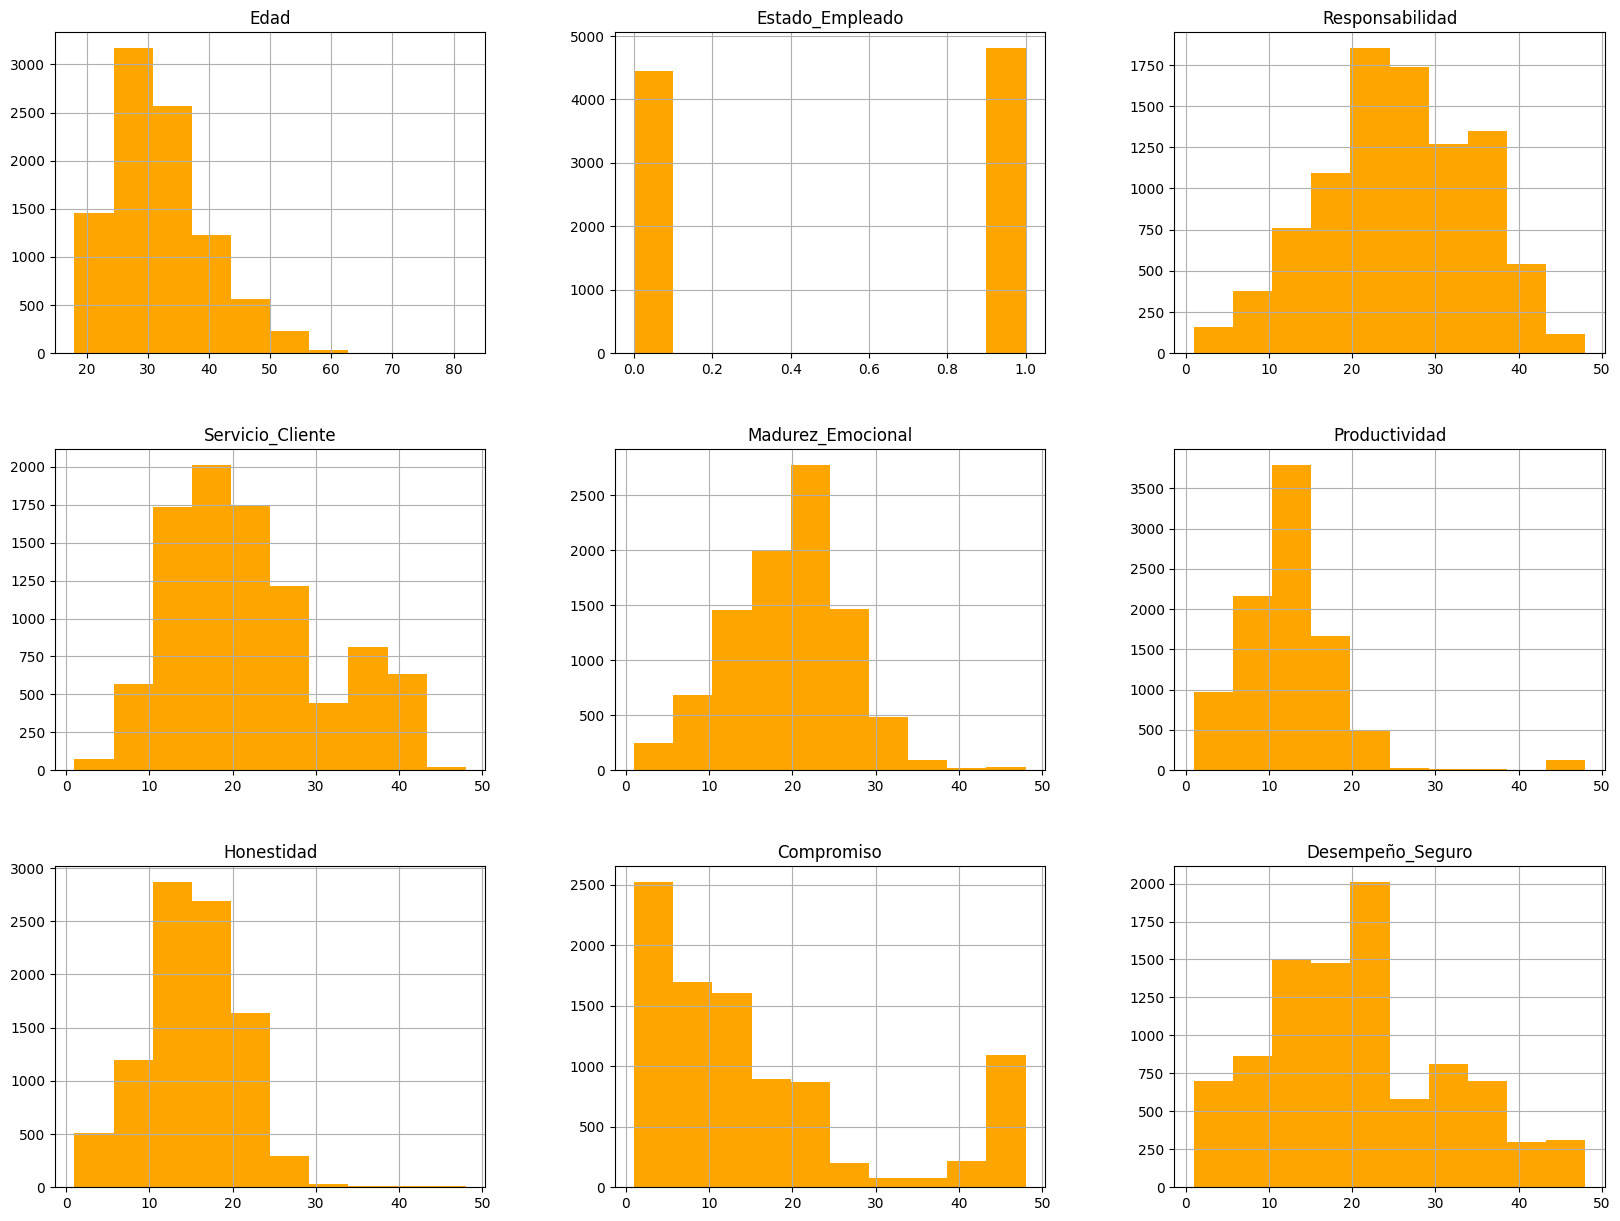

In [5]:
df.hist(figsize=(20,15), color = 'orange')
plt.show()

In [6]:
conteo = df.groupby('Estado_Empleado').size()
print("Actualmente tenemos un total de ",conteo[1],"Activos")
print("Actualmente tenemos un total de ",conteo[0],"Retirados\n")
print("* = "*15,"\n")
df.info()

Actualmente tenemos un total de  4818 Activos
Actualmente tenemos un total de  4446 Retirados

* = * = * = * = * = * = * = * = * = * = * = * = * = * = * =  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 0 to 11228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edad               9264 non-null   int64 
 1   Genero             9264 non-null   object
 2   Tpo_Contrato       9264 non-null   object
 3   Estado_Empleado    9264 non-null   int64 
 4   Responsabilidad    9264 non-null   int64 
 5   Servicio_Cliente   9264 non-null   int64 
 6   Madurez_Emocional  9264 non-null   int64 
 7   Productividad      9264 non-null   int64 
 8   Honestidad         9264 non-null   int64 
 9   Compromiso         9264 non-null   int64 
 10  Desempeño_Seguro   9264 non-null   int64 
 11  ERI                9264 non-null   object
dtypes: int64(9), object(3)
memory usage: 940.9+ KB


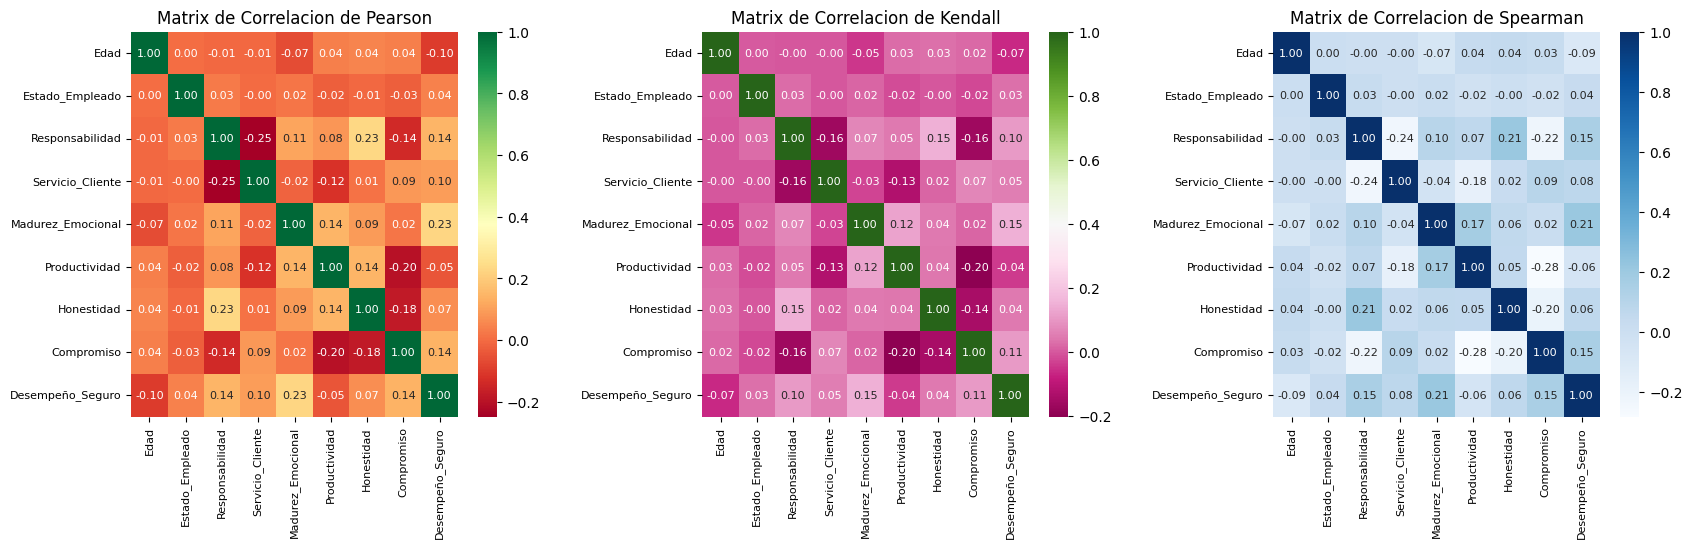

In [7]:
# Calculo las matrices de correlación usando el metodo de pearson , kendall y spearman
Pearson = df.corr(numeric_only=True)
Kendal = df.corr(method='kendall', numeric_only=True)
Spearman = df.corr(method='spearman', numeric_only=True)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))# Crear la figura y los subplots
# Matriz de correlación Pearson
sns.heatmap(Pearson, annot=True, cmap='RdYlGn', fmt=".2f", annot_kws={"size": 8}, ax=axes[0])
axes[0].set_title('Matrix de Correlacion de Pearson', fontsize=12)
axes[0].tick_params(labelsize=8)
# Matriz de correlación Kendall
sns.heatmap(Kendal, annot=True, cmap='PiYG', fmt=".2f", annot_kws={"size": 8}, ax=axes[1])
axes[1].set_title('Matrix de Correlacion de Kendall', fontsize=12)
axes[1].tick_params(labelsize=8)
# Matriz de correlación Spearman
sns.heatmap(Spearman, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 8}, ax=axes[2])
axes[2].set_title('Matrix de Correlacion de Spearman', fontsize=12)
axes[2].tick_params(labelsize=8)
plt.subplots_adjust(wspace=0.4)# Ajusto los espacios entre los subplots
plt.show()

In [8]:
#Identificamos las variables categoricas y convertimos en lista solo para Df Activos
CatCols = df.select_dtypes(include=["object"]).columns.tolist()
df[CatCols].columns

Index(['Genero', 'Tpo_Contrato', 'ERI'], dtype='object')

In [9]:
#Identificamos las variables Numericas y convertimos en lista solo para Df Activos
NumCols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[NumCols].head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0    36                0               42                25   
1    37                0               16                11   
2    40                0               33                22   
3    35                0               24                21   
4    42                0               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  
0                 20             10          23          21                37  
1                 31             14           8           3                15  
2                 21             13          22          20                42  
3                 25             17          21           7                17  
4                 31             48          25          40                23

In [10]:
#visualizaos todo el contenido por cada variable
for ind, col in enumerate(df[CatCols].columns):
    print('==============================')
    print(df.groupby(col).Genero.count().sort_values(ascending=False))

Genero
M    6680
F    2584
Name: Genero, dtype: int64
Tpo_Contrato
Fijo          6884
Indefinido    2380
Name: Genero, dtype: int64
ERI
DP    4510
PS    4144
FP     591
NV      19
Name: Genero, dtype: int64


In [11]:
#realizo un describe solo a variabls numericas Para estos porcentajes
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.975])

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
count  9264.000000      9264.000000      9264.000000       9264.000000   
mean     31.958657         0.520078        25.536701         22.062284   
std       7.673385         0.499624         9.151758          9.242490   
min      18.000000         0.000000         1.000000          1.000000   
1%       20.000000         0.000000         4.000000          6.000000   
10%      23.000000         0.000000        13.000000         12.000000   
20%      25.000000         0.000000        18.000000         14.000000   
30%      27.000000         0.000000        21.000000         16.000000   
40%      29.000000         0.000000        23.000000         18.000000   
50%      30.000000         1.000000        26.000000         20.000000   
60%      32.000000         1.000000        28.000000         23.000000   
70%      35.000000         1.000000        31.000000         26.000000   
80%      38.000000         1.000000        34.000000         30.000000   
90%      43.000000         1.000000        38.000000         37.000000   
97.5%    50.000000         1.000000        42.000000         41.000000   
max      82.000000         1.000000        48.000000         48.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        9264.000000    9264.000000  9264.000000  9264.000000   
mean           19.641192      12.619603    15.284650    15.775583   
std             7.035262       6.496476     5.724658    14.567901   
min             1.000000       1.000000     1.000000     1.000000   
1%              2.000000       1.000000     1.000000     1.000000   
10%            10.000000       5.000000     8.000000     1.000000   
20%            14.000000       8.000000    11.000000     3.000000   
30%            16.000000      10.000000    13.000000     7.000000   
40%            18.000000      11.000000    14.000000     9.000000   
50%            20.000000      12.000000    16.000000    11.000000   
60%            21.000000      14.000000    17.000000    14.000000   
70%            24.000000      15.000000    18.000000    18.000000   
80%            25.000000      17.000000    20.000000    23.000000   
90%            28.000000      19.000000    22.000000    48.000000   
97.5%          32.000000      23.000000    25.000000    48.000000   
max            48.000000      48.000000    48.000000    48.000000   

       Desempeño_Seguro  
count       9264.000000  
mean          20.705203  
std           10.866526  
min            1.000000  
1%             1.000000  
10%            7.000000  
20%           12.000000  
30%           15.000000  
40%           17.000000  
50%           20.000000  
60%           22.000000  
70%           24.000000  
80%           31.000000  
90%           35.000000  
97.5%         46.000000  
max           48.000000

<Axes: xlabel='Desempeño_Seguro'>

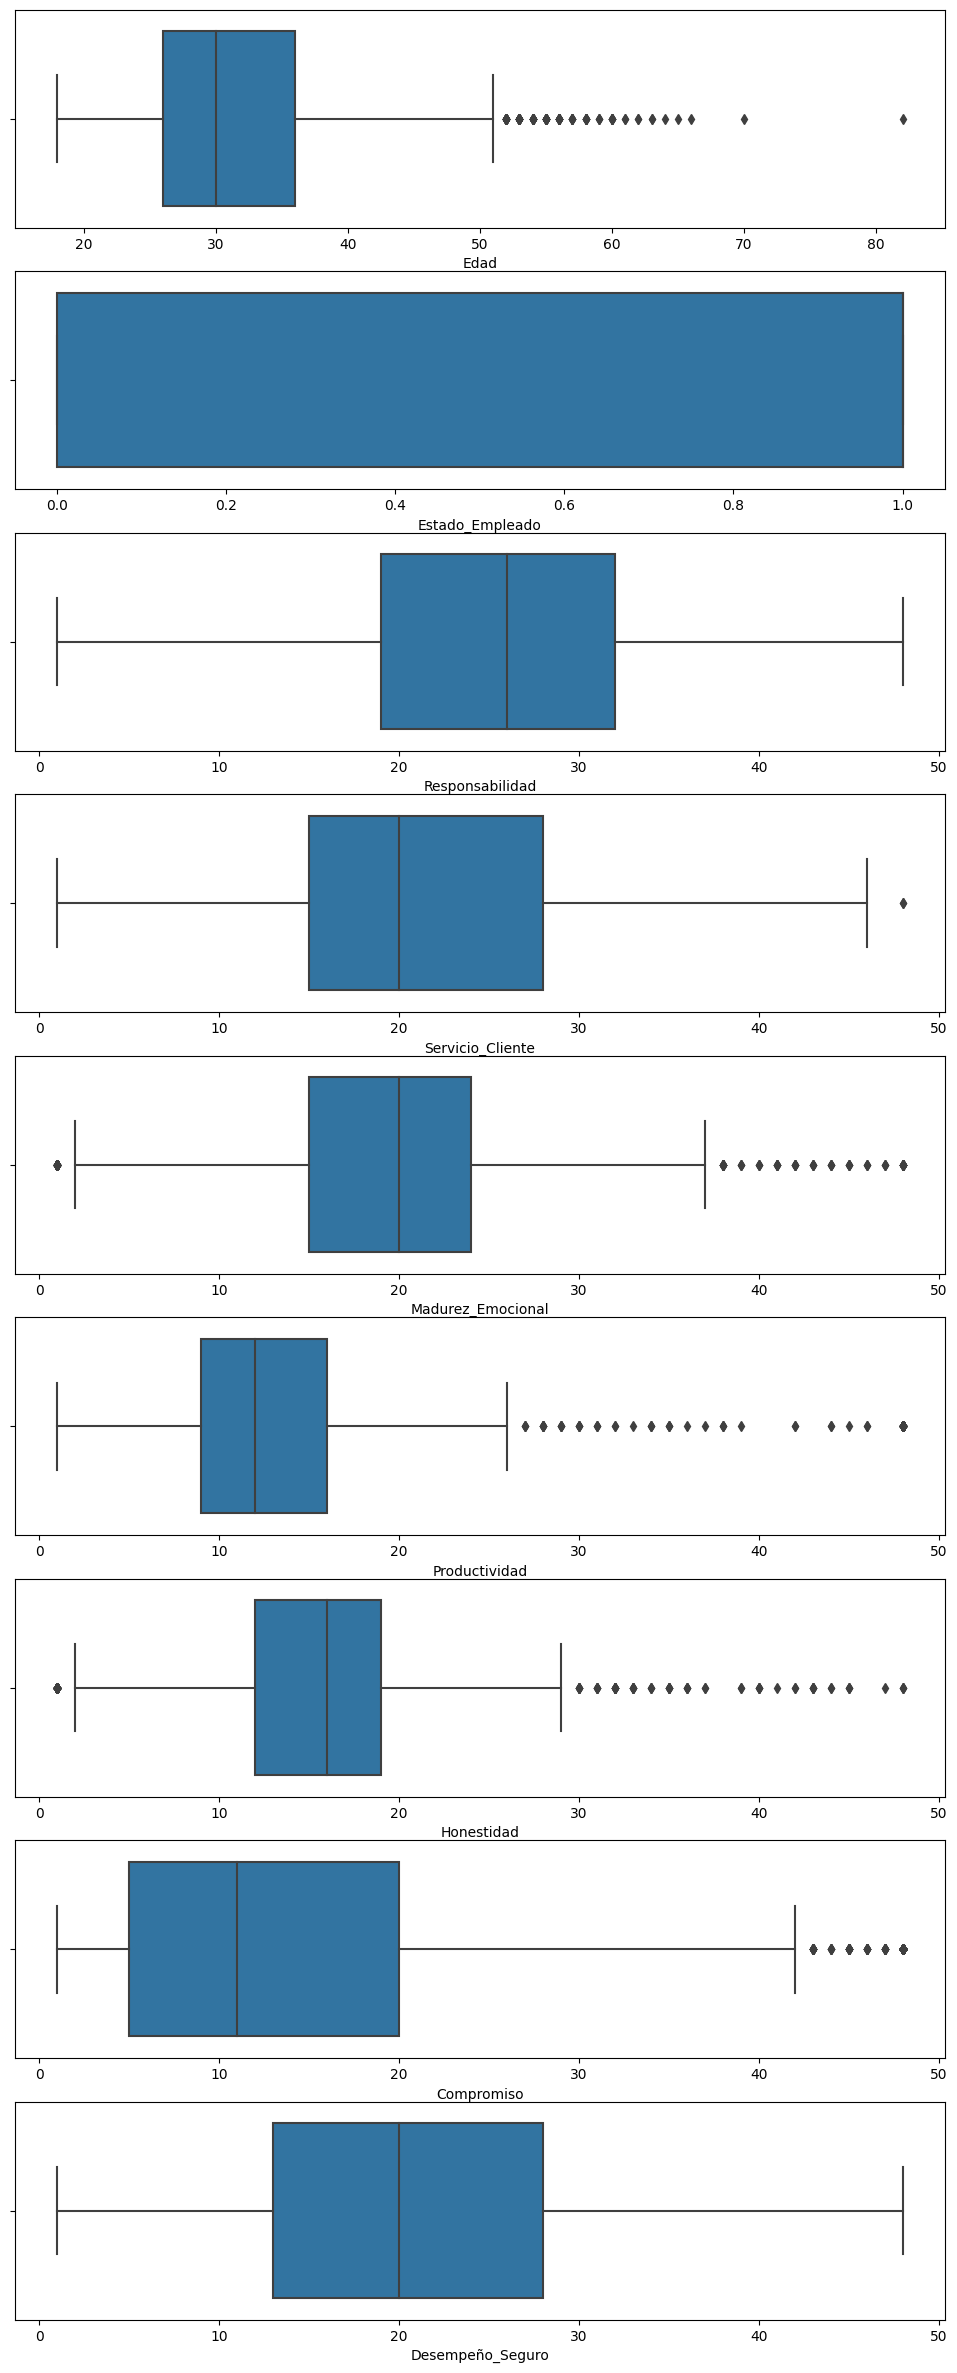

In [12]:
plt.rcParams['figure.figsize'] = (12,30)
fig, axs = plt.subplots(9, 1)

sns.boxplot(ax=axs[0], x=df.Edad)
sns.boxplot(ax=axs[1], x=df.Estado_Empleado)
sns.boxplot(ax=axs[2], x=df.Responsabilidad)
sns.boxplot(ax=axs[3], x=df.Servicio_Cliente)
sns.boxplot(ax=axs[4], x=df.Madurez_Emocional)
sns.boxplot(ax=axs[5], x=df.Productividad)
sns.boxplot(ax=axs[6], x=df.Honestidad)
sns.boxplot(ax=axs[7], x=df.Compromiso)
sns.boxplot(ax=axs[8], x=df.Desempeño_Seguro)

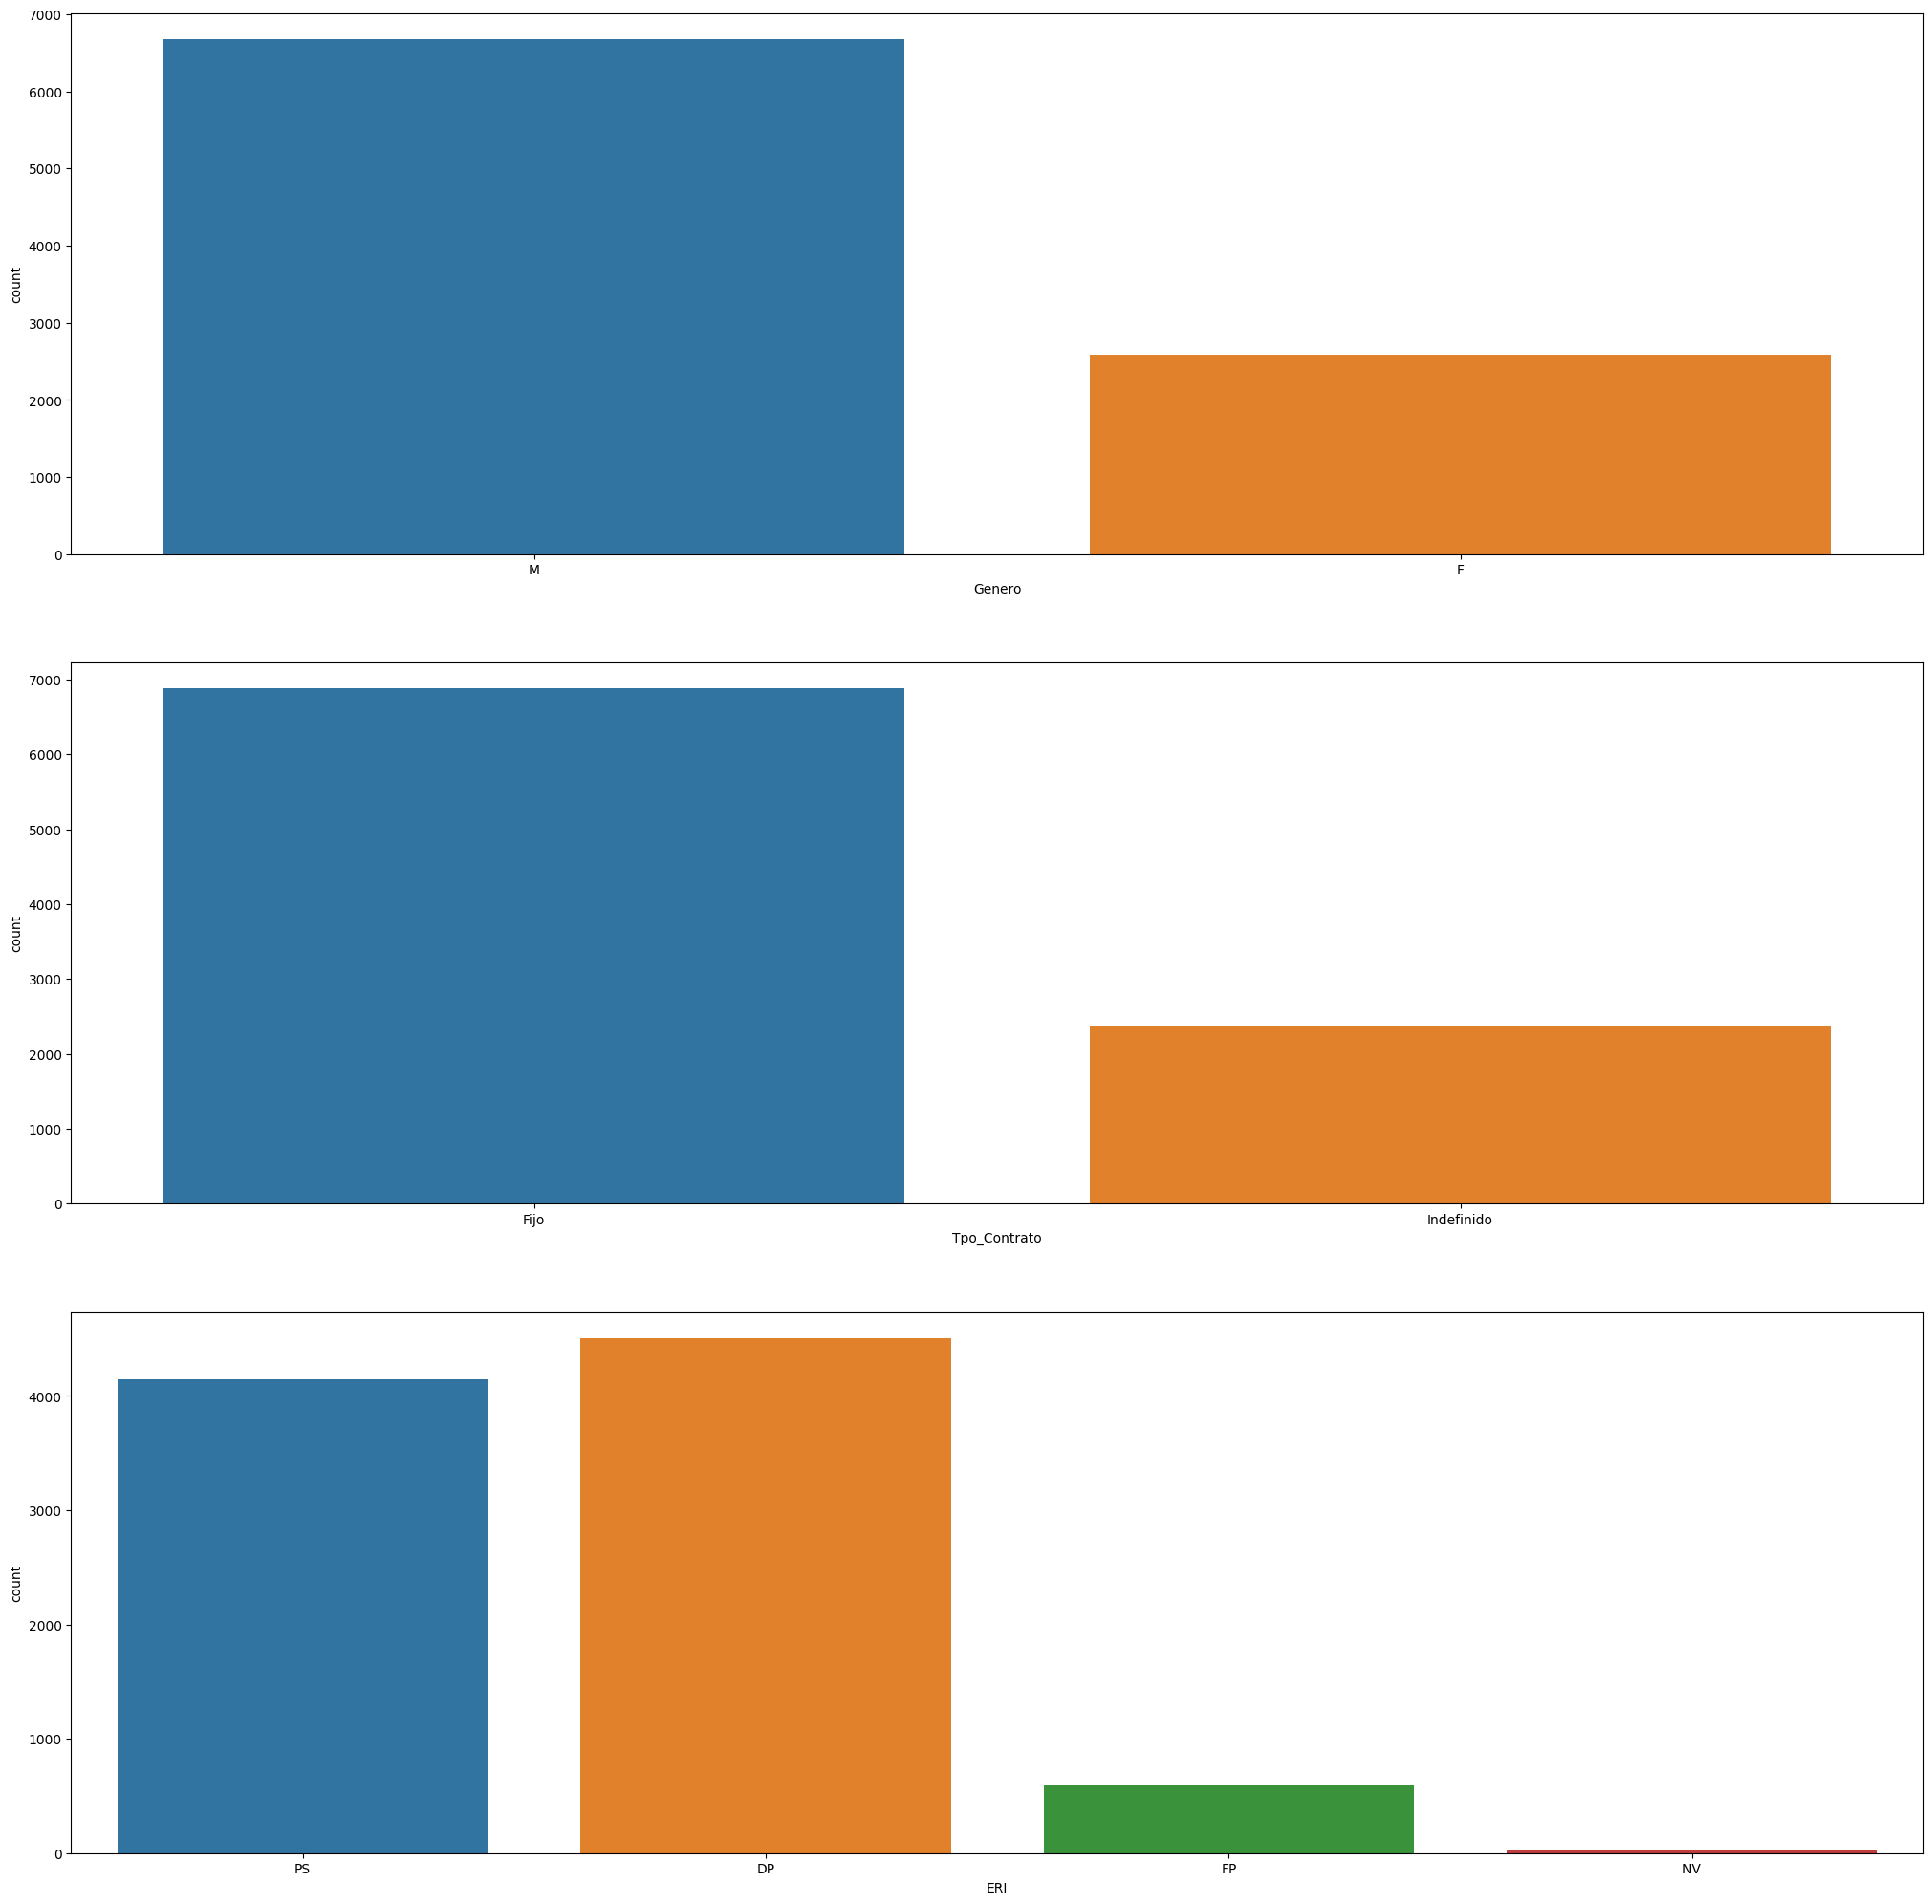

In [13]:
#Graficamos las variables categoricas
plot_multiples_graficas(df,CatCols,1,3,'c',None,(25,25))

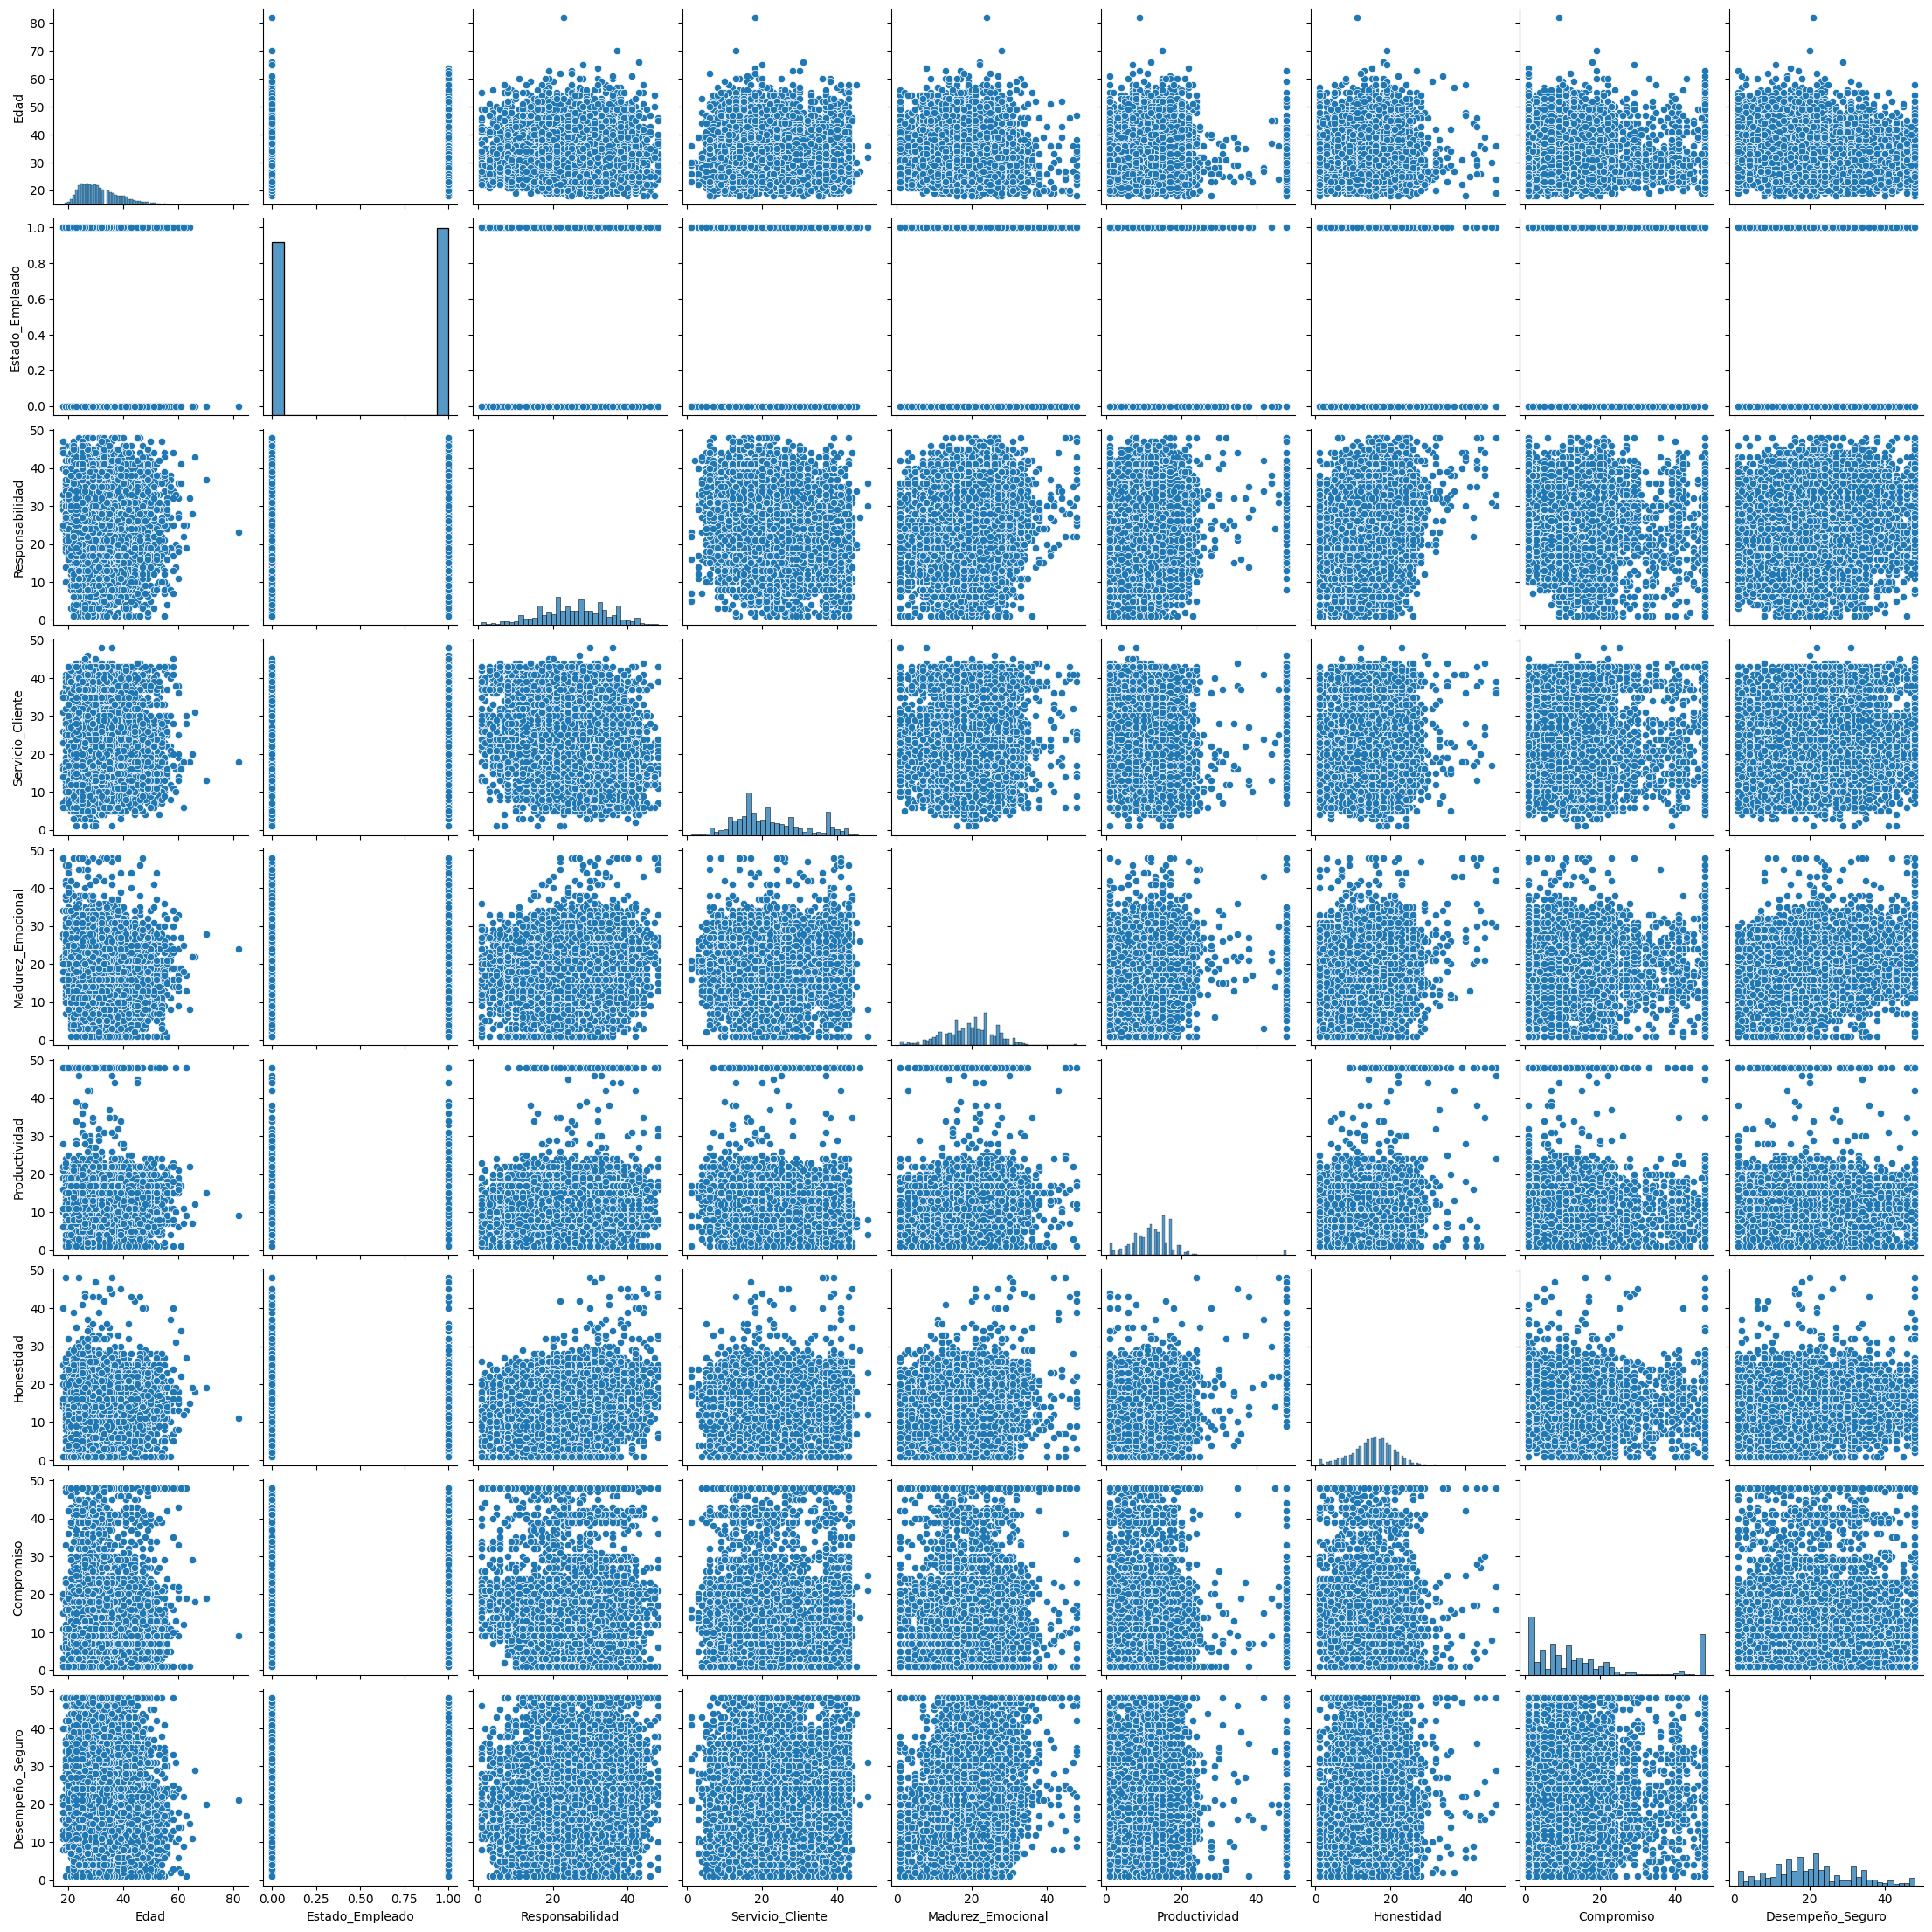

In [14]:
#graficamos las variables Numericas
sns.pairplot(df[NumCols])

## Corvertir a variables dummies

In [15]:
dfdum =pd.get_dummies(data =df)
dfdum.head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0    36                0               42                25   
1    37                0               16                11   
2    40                0               33                22   
3    35                0               24                21   
4    42                0               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0                 20             10          23          21                37   
1                 31             14           8           3                15   
2                 21             13          22          20                42   
3                 25             17          21           7                17   
4                 31             48          25          40                23   

   Genero_F  Genero_M  Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  ERI_DP  \
0         0         1                  1                        0       0   
1         0         1                  1                        0       0   
2         0         1                  1                        0       0   
3         0         1                  1                        0       0   
4         1         0                  1                        0       0   

   ERI_FP  ERI_NV  ERI_PS  
0       0       0       1  
1       0       0       1  
2       0       0       1  
3       0       0       1  
4       0       0       1

## Normalización de los datos para el Df

In [16]:
#Reset al index ya que me puso valores diferentes
data_norm = (dfdum-dfdum.min())/(dfdum.max()-dfdum.min())
data_norm = data_norm.reset_index(drop=True)
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     9264 non-null   float64
 1   Estado_Empleado          9264 non-null   float64
 2   Responsabilidad          9264 non-null   float64
 3   Servicio_Cliente         9264 non-null   float64
 4   Madurez_Emocional        9264 non-null   float64
 5   Productividad            9264 non-null   float64
 6   Honestidad               9264 non-null   float64
 7   Compromiso               9264 non-null   float64
 8   Desempeño_Seguro         9264 non-null   float64
 9   Genero_F                 9264 non-null   float64
 10  Genero_M                 9264 non-null   float64
 11  Tpo_Contrato_Fijo        9264 non-null   float64
 12  Tpo_Contrato_Indefinido  9264 non-null   float64
 13  ERI_DP                   9264 non-null   float64
 14  ERI_FP                  

## Hallar el número de clusters óptimo

Text(0, 0.5, 'wcss')

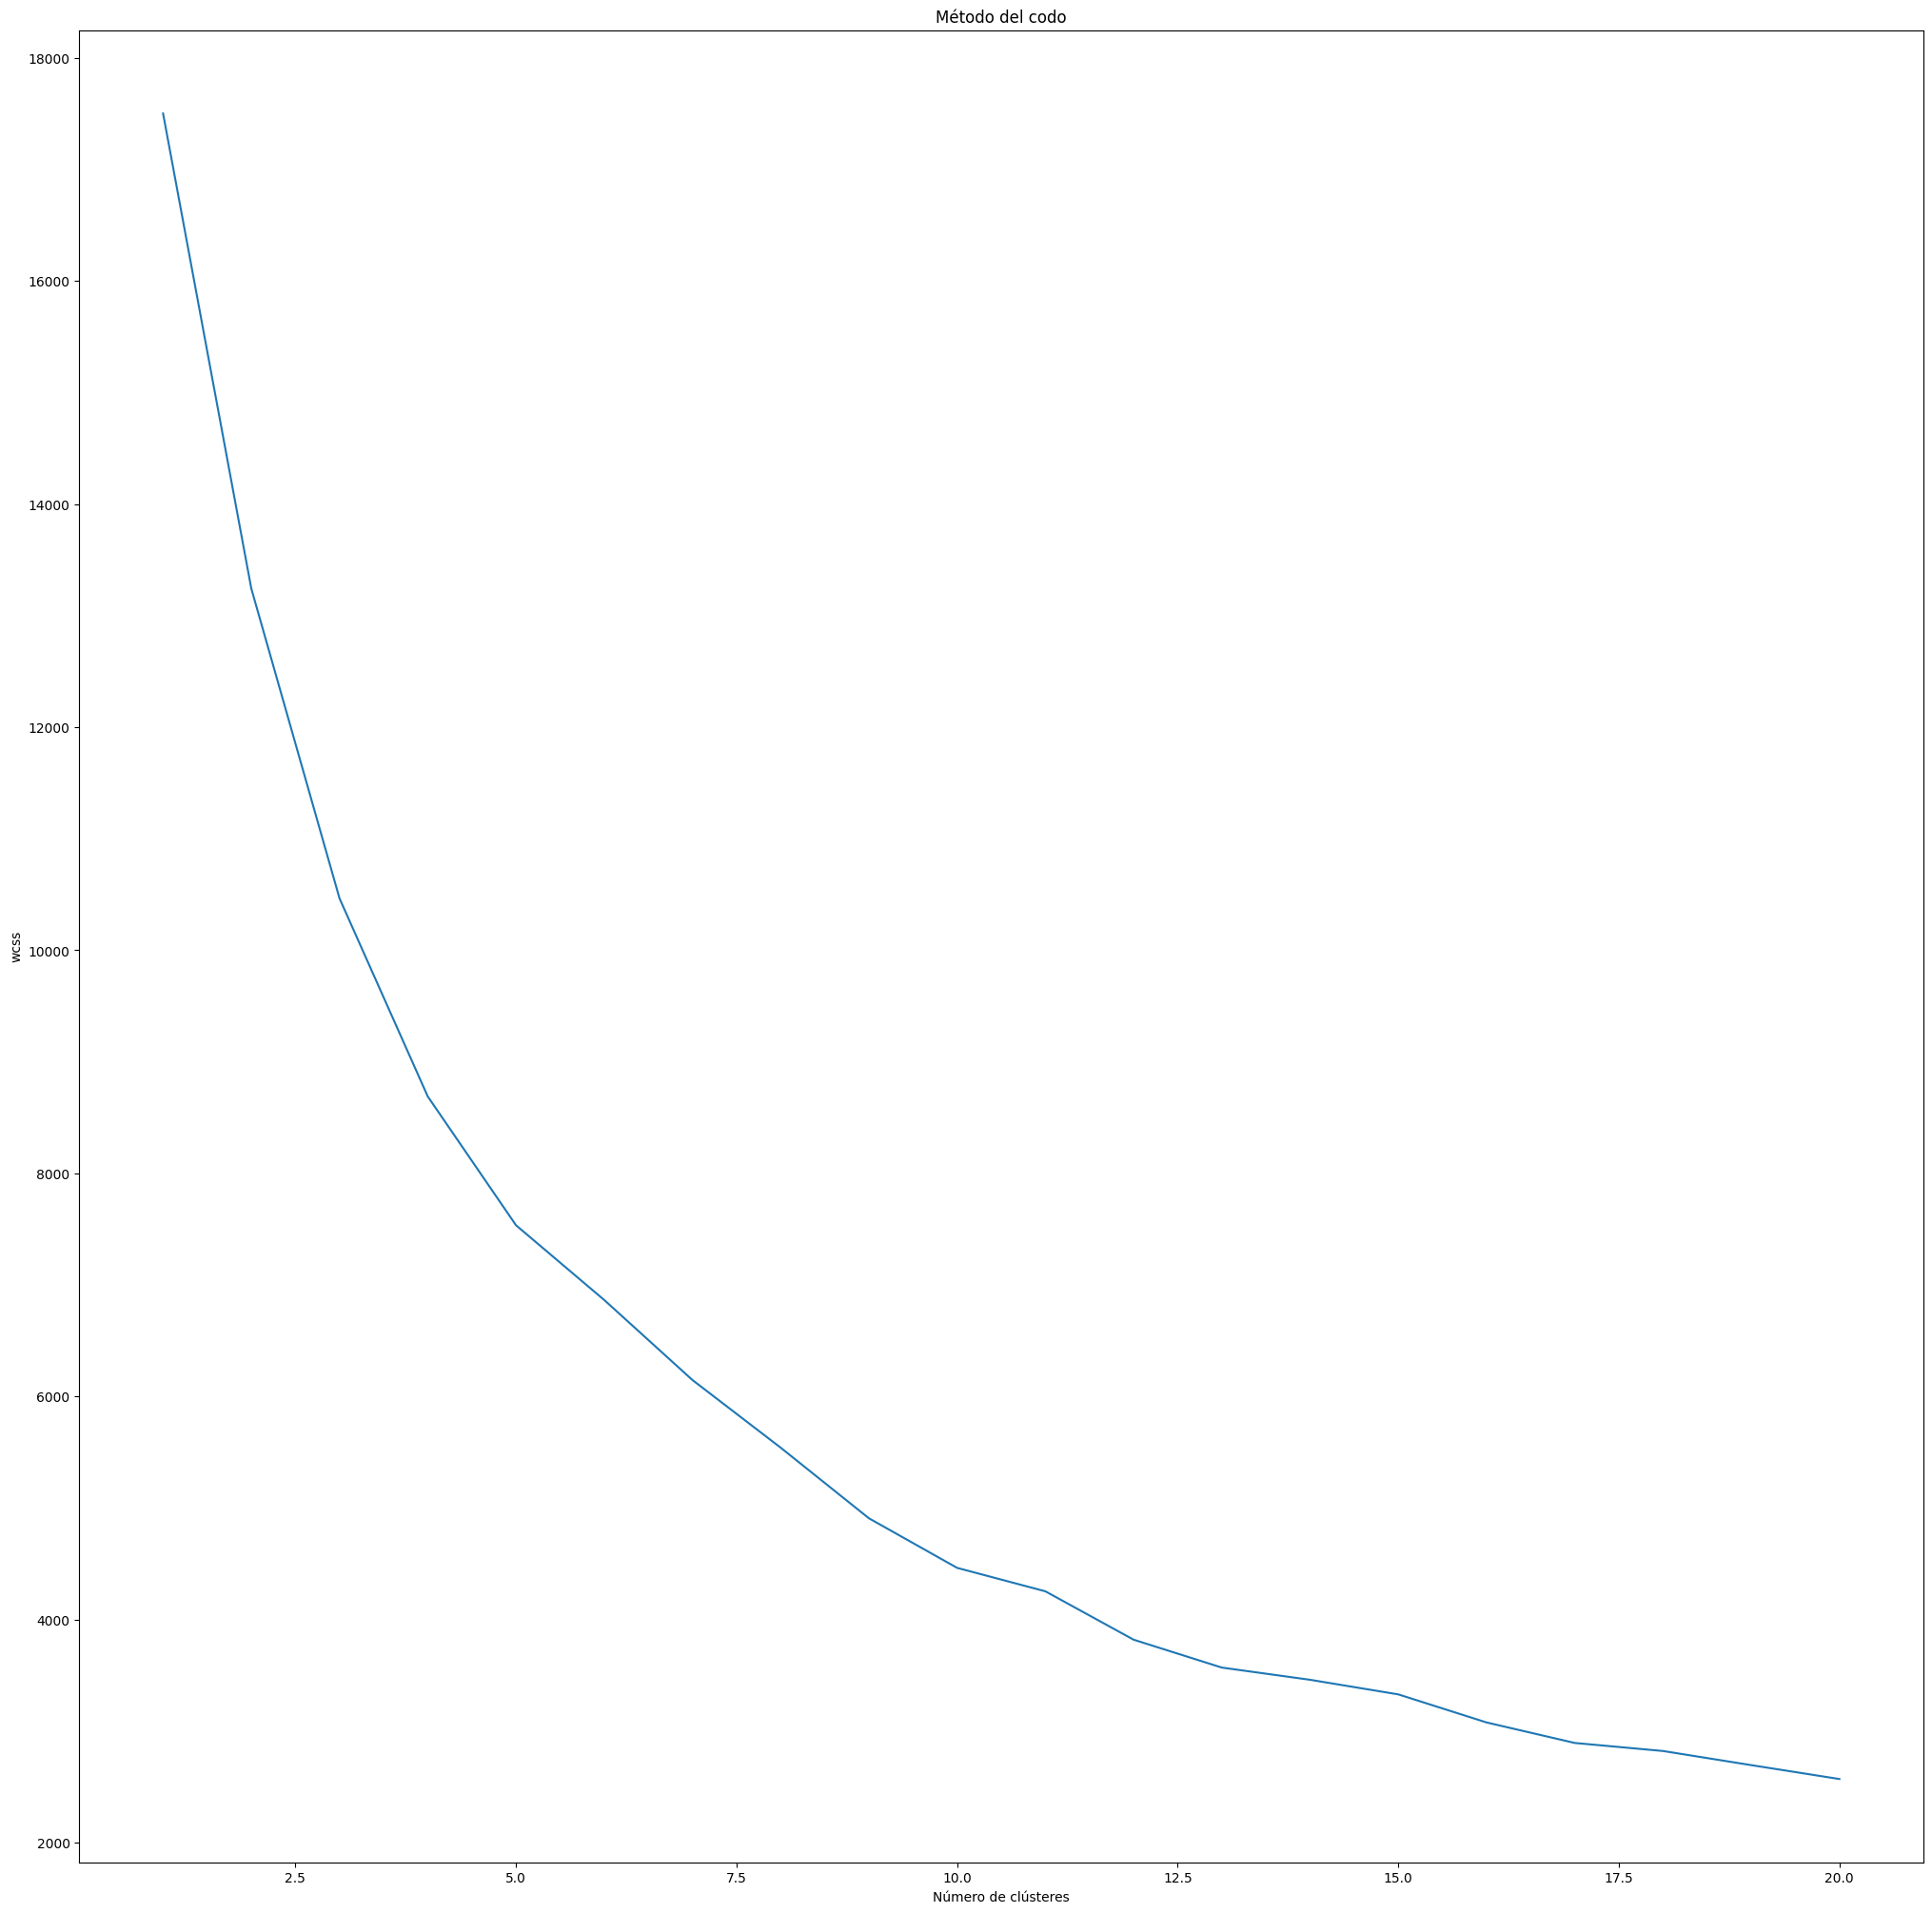

In [17]:
wcss=[]

for i in range(1,21):
  kmeans = KMeans(n_clusters=i,max_iter=300,  n_init=10)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,21),wcss)
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")

Text(0.5, 1.0, 'Índice de Silhouette')

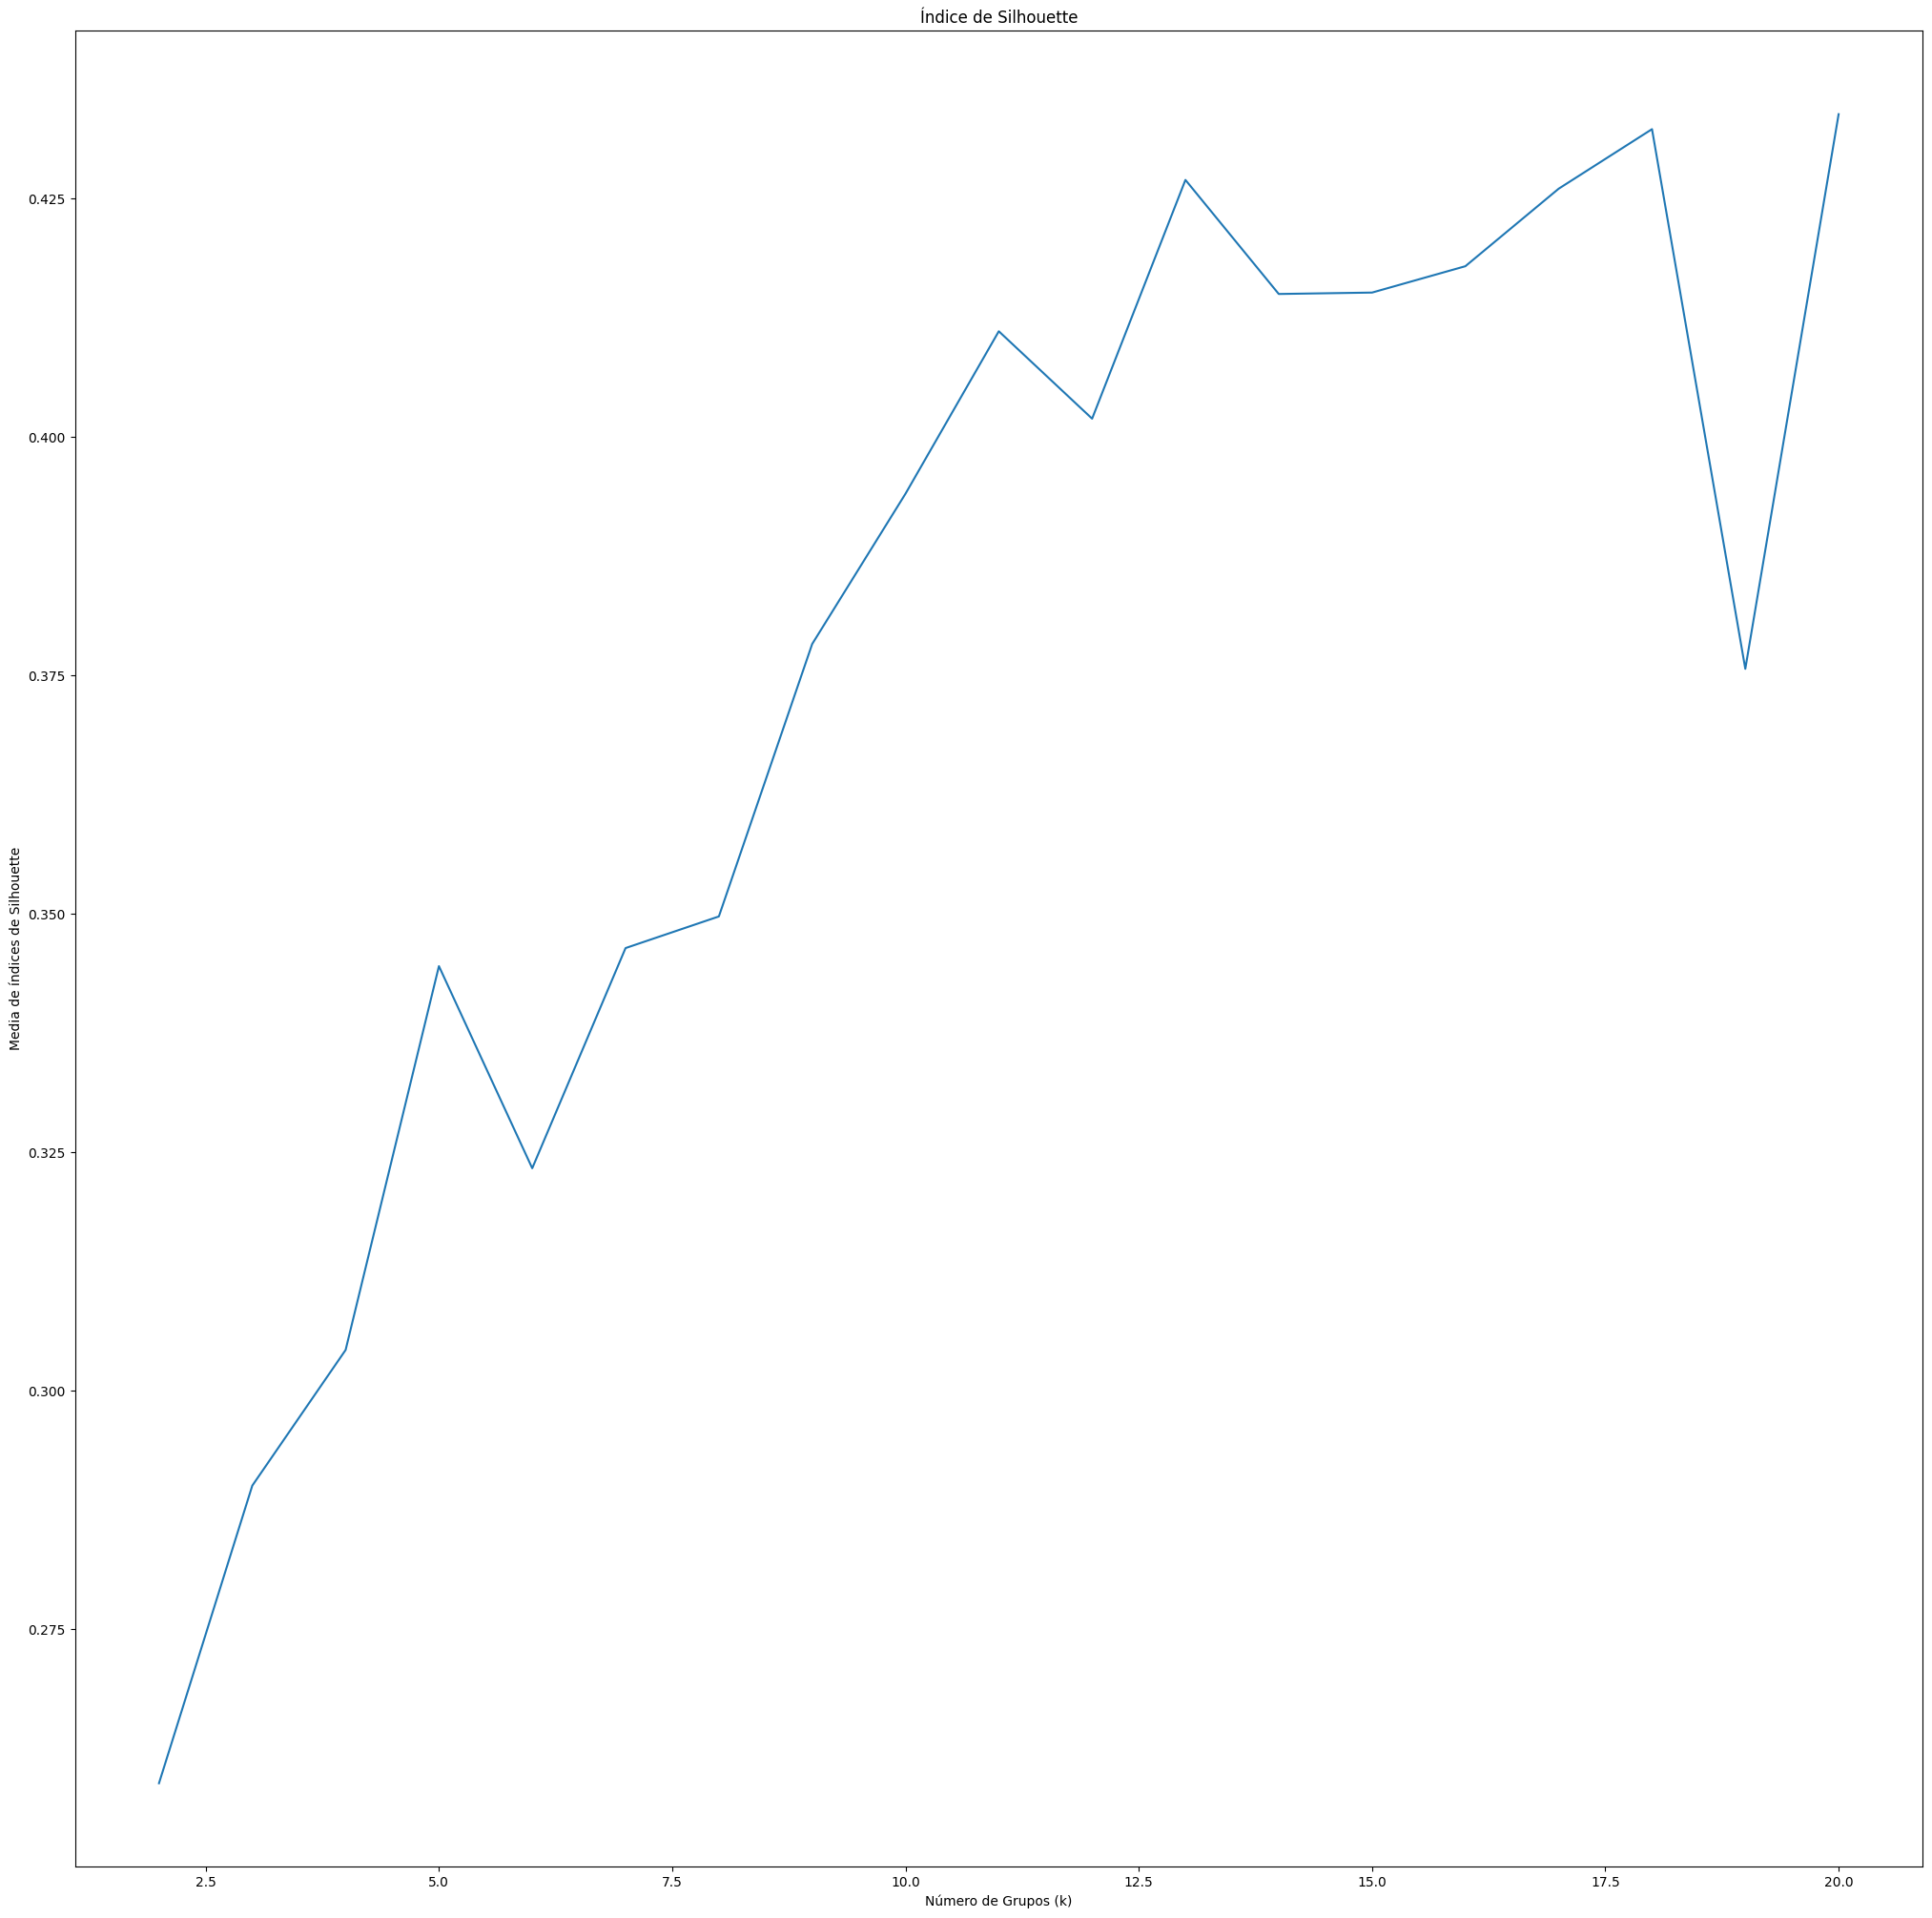

In [18]:
numeroCluster = range(2, 21)
valoresMedios = []

for n_clusters in numeroCluster:
  modeloKmeans = KMeans(n_clusters=n_clusters, n_init=10)
  labels = modeloKmeans.fit_predict(data_norm)
  mediaSilhouette = silhouette_score(data_norm, labels)
  valoresMedios.append(mediaSilhouette)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Media de índices de Silhouette')
plt.title('Índice de Silhouette')


## Aplicar el clustering

In [19]:
#Aplicamos clusterin con 8 clusters que 
clustering = KMeans(n_clusters=5, max_iter=300, n_init=10)
clustering.fit(data_norm)
clustering.cluster_centers_

array([[ 2.29796426e-01,  4.71051595e-01,  4.66350465e-01,
         4.14738589e-01,  3.37878039e-01,  2.39062120e-01,
         2.79101338e-01,  2.34788365e-01,  3.10400308e-01,
        -4.44089210e-16,  1.00000000e+00,  1.00000000e+00,
        -7.21644966e-16,  1.00000000e+00,  5.55111512e-16,
         8.67361738e-19,  9.43689571e-16],
       [ 2.06536911e-01,  4.59677419e-01,  5.19257167e-01,
         4.78103057e-01,  4.01127184e-01,  2.49366454e-01,
         3.10002112e-01,  3.28467346e-01,  4.59585027e-01,
         1.00000000e+00, -1.99840144e-15,  1.00000000e+00,
        -1.66533454e-16,  4.85732010e-01,  9.18114144e-02,
         1.86104218e-03,  4.20595533e-01],
       [ 2.27194246e-01,  4.45664105e-01,  4.97022211e-01,
         4.87547781e-01,  4.39015656e-01,  2.56323423e-01,
         3.18962094e-01,  4.49953679e-01,  4.28038707e-01,
        -2.77555756e-16,  1.00000000e+00,  1.00000000e+00,
        -1.11022302e-15,  2.38697950e-15,  9.33040615e-02,
         4.02488108e-03,  9.0

## Agregar a la clasificación original

In [20]:
data_norm['KMeans_Clusters'] = clustering.labels_
data_norm

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0     0.281250              0.0         0.872340          0.510638   
1     0.296875              0.0         0.319149          0.212766   
2     0.343750              0.0         0.680851          0.446809   
3     0.265625              0.0         0.489362          0.425532   
4     0.375000              0.0         0.829787          0.468085   
...        ...              ...              ...               ...   
9259  0.062500              1.0         0.446809          0.446809   
9260  0.093750              1.0         0.255319          0.553191   
9261  0.078125              1.0         0.659574          0.574468   
9262  0.078125              1.0         0.170213          0.404255   
9263  0.390625              1.0         0.787234          0.404255   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
0              0.404255       0.191489    0.468085    0.425532   
1              0.638298       0.276596    0.148936    0.042553   
2              0.425532       0.255319    0.446809    0.404255   
3              0.510638       0.340426    0.425532    0.127660   
4              0.638298       1.000000    0.510638    0.829787   
...                 ...            ...         ...         ...   
9259           0.510638       0.276596    0.276596    0.170213   
9260           0.361702       0.042553    0.042553    0.425532   
9261           0.255319       0.702128    0.063830    0.255319   
9262           0.361702       0.212766    0.319149    0.297872   
9263           0.319149       0.297872    0.319149    0.021277   

      Desempeño_Seguro  Genero_F  Genero_M  Tpo_Contrato_Fijo  \
0             0.765957       0.0       1.0                1.0   
1             0.297872       0.0       1.0                1.0   
2             0.872340       0.0       1.0                1.0   
3             0.340426       0.0       1.0                1.0   
4             0.468085       1.0       0.0                1.0   
...                ...       ...       ...                ...   
9259          0.808511       0.0       1.0                1.0   
9260          0.893617       1.0       0.0                1.0   
9261          0.425532       0.0       1.0                0.0   
9262          0.212766       1.0       0.0                1.0   
9263          0.425532       1.0       0.0                1.0   

      Tpo_Contrato_Indefinido  ERI_DP  ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0                         0.0     0.0     0.0     0.0     1.0                2  
1                         0.0     0.0     0.0     0.0     1.0                2  
2                         0.0     0.0     0.0     0.0     1.0                2  
3                         0.0     0.0     0.0     0.0     1.0                2  
4                         0.0     0.0     0.0     0.0     1.0                1  
...                       ...     ...     ...     ...     ...              ...  
9259                      0.0     1.0     0.0     0.0     0.0                0  
9260                      0.0     1.0     0.0     0.0     0.0                1  
9261                      1.0     0.0     1.0     0.0     0.0                3  
9262                      0.0     1.0     0.0     0.0     0.0                1  
9263                      0.0     1.0     0.0     0.0     0.0                1  

[9264 rows x 18 columns]

In [21]:
data_normAct = data_norm.dropna()
data_normAct.head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0  0.281250              0.0         0.872340          0.510638   
1  0.296875              0.0         0.319149          0.212766   
2  0.343750              0.0         0.680851          0.446809   
3  0.265625              0.0         0.489362          0.425532   
4  0.375000              0.0         0.829787          0.468085   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.404255       0.191489    0.468085    0.425532          0.765957   
1           0.638298       0.276596    0.148936    0.042553          0.297872   
2           0.425532       0.255319    0.446809    0.404255          0.872340   
3           0.510638       0.340426    0.425532    0.127660          0.340426   
4           0.638298       1.000000    0.510638    0.829787          0.468085   

   Genero_F  Genero_M  Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  ERI_DP  \
0       0.0       1.0                1.0                      0.0     0.0   
1       0.0       1.0                1.0                      0.0     0.0   
2       0.0       1.0                1.0                      0.0     0.0   
3       0.0       1.0                1.0                      0.0     0.0   
4       1.0       0.0                1.0                      0.0     0.0   

   ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0     0.0     0.0     1.0                2  
1     0.0     0.0     1.0                2  
2     0.0     0.0     1.0                2  
3     0.0     0.0     1.0                2  
4     0.0     0.0     1.0                1

## Visualización

In [22]:
pca = PCA(n_components=2)#Quiero un grafico de 2 dimenciones con el modelo pca
pca_data=pca.fit_transform(data_norm)#Aplico fit del modelo pca
pca_data_df= pd.DataFrame(data=pca_data, columns=['Componente1', 'Componente2'])#Creo un df con los valores de las 2 componentes principales
pca_add = pd.concat([pca_data_df, data_norm['KMeans_Clusters']], axis=1)#indico los 2 objetos a concatenar y axis=1 para indicar que son columnas
pca_add.head()

Componente1  Componente2  KMeans_Clusters
0     0.299674    -0.981663                2
1     0.257338    -0.911194                2
2     0.297504    -0.982963                2
3     0.266374    -0.931943                2
4    -0.442519    -0.602811                1

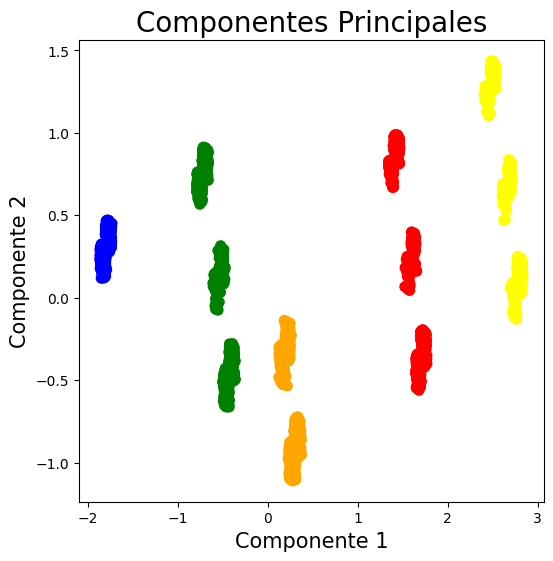

In [23]:
fig = plt.figure(figsize=(6,6))#Creamos figura de tamaño 6*6 y se guarda en fig

ax = fig.add_subplot(1,1,1)#creo solo 1 grafico dentro de la figura y lo guardo en ax
ax.set_xlabel('Componente 1', fontsize = 15)#Nombres de ejes 
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)#Nombre de grafico

color_theme = np.array(["blue","green", "orange","red","yellow"])#Creo un array para guardar los colores y lo guardo en color_theme
ax.scatter(x = pca_add.Componente1, y = pca_add.Componente2, #Dibujo los puntos que representan a los vino por scatter x = componente1 y y= componente 2
            c= color_theme[pca_add.KMeans_Clusters], s=50) #utilizo el parametro c para los colores de los puntos  s= tamaño de lso puntos a graficar
plt.show()

# Dividimos el Dataset y ver el comportamiento que tienen cada Grupo
Y Realizamos el mismo proceso con cada grupo 

In [24]:
#Dividimos el Dataset segun el valor de la columna estado
dfActivos= df[df['Estado_Empleado']==1]
dfRetirados= df[df['Estado_Empleado']==0]
print("El dataset de Activos quedo con",dfActivos.shape[0],"Registros y",dfActivos.shape[1],"Columnas")
print("El dataset de Retirados quedo con",dfRetirados.shape[0],"Registros y",dfRetirados.shape[1],"Columnas")

El dataset de Activos quedo con 4818 Registros y 12 Columnas
El dataset de Retirados quedo con 4446 Registros y 12 Columnas


In [25]:
dfActivos.describe()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
count  4818.000000           4818.0      4818.000000       4818.000000   
mean     31.981943              1.0        25.764633         22.032794   
std       7.712062              0.0         9.169602          9.231716   
min      18.000000              1.0         1.000000          1.000000   
25%      26.000000              1.0        19.000000         15.000000   
50%      31.000000              1.0        26.000000         20.000000   
75%      37.000000              1.0        33.000000         28.000000   
max      64.000000              1.0        48.000000         48.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        4818.000000    4818.000000  4818.000000  4818.000000   
mean           19.773557      12.468037    15.247198    15.375467   
std             7.040939       6.256233     5.572341    14.290702   
min             1.000000       1.000000     1.000000     1.000000   
25%            15.000000       9.000000    12.000000     5.000000   
50%            20.000000      12.000000    16.000000    11.000000   
75%            24.000000      15.000000    19.000000    20.000000   
max            48.000000      48.000000    48.000000    48.000000   

       Desempeño_Seguro  
count       4818.000000  
mean          21.126401  
std           10.986111  
min            1.000000  
25%           14.000000  
50%           20.000000  
75%           29.000000  
max           48.000000

In [26]:
#Identificamos las variables categoricas y convertimos en lista solo para Df Activos
CatColsAct = dfActivos.select_dtypes(include=["object"]).columns.tolist()
df[CatColsAct].columns

Index(['Genero', 'Tpo_Contrato', 'ERI'], dtype='object')

In [27]:
#Identificamos las variables Numericas y convertimos en lista solo para Df Activos
NumColsAct = dfActivos.select_dtypes(include=['int64','float64']).columns.tolist()
df[NumColsAct].head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0    36                0               42                25   
1    37                0               16                11   
2    40                0               33                22   
3    35                0               24                21   
4    42                0               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  
0                 20             10          23          21                37  
1                 31             14           8           3                15  
2                 21             13          22          20                42  
3                 25             17          21           7                17  
4                 31             48          25          40                23

## Trabajamos primero con el Dataset de Activos

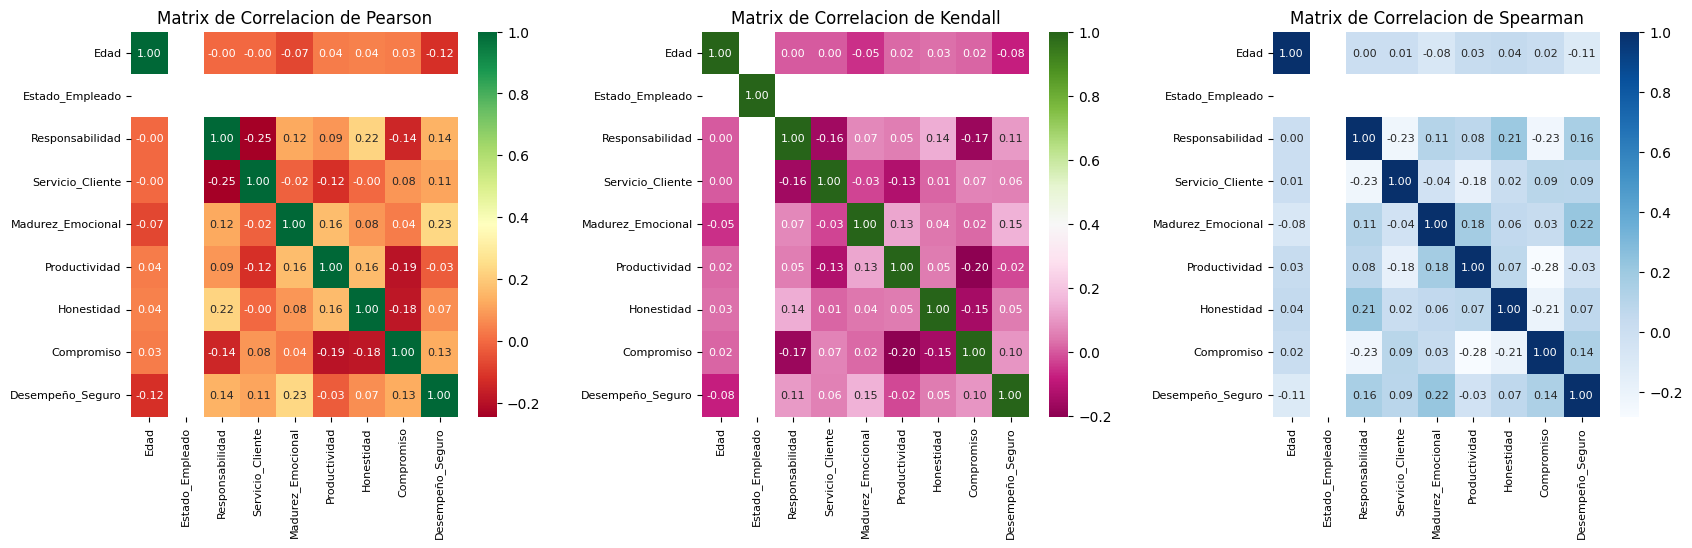

In [28]:
# Calculo las matrices de correlación usando el metodo de pearson , kendall y spearman
Pearson = dfActivos.corr(numeric_only=True)
Kendal = dfActivos.corr(method='kendall', numeric_only=True)
Spearman = dfActivos.corr(method='spearman', numeric_only=True)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))# Crear la figura y los subplots
# Matriz de correlación Pearson
sns.heatmap(Pearson, annot=True, cmap='RdYlGn', fmt=".2f", annot_kws={"size": 8}, ax=axes[0])
axes[0].set_title('Matrix de Correlacion de Pearson', fontsize=12)
axes[0].tick_params(labelsize=8)
# Matriz de correlación Kendall
sns.heatmap(Kendal, annot=True, cmap='PiYG', fmt=".2f", annot_kws={"size": 8}, ax=axes[1])
axes[1].set_title('Matrix de Correlacion de Kendall', fontsize=12)
axes[1].tick_params(labelsize=8)
# Matriz de correlación Spearman
sns.heatmap(Spearman, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 8}, ax=axes[2])
axes[2].set_title('Matrix de Correlacion de Spearman', fontsize=12)
axes[2].tick_params(labelsize=8)
plt.subplots_adjust(wspace=0.4)# Ajusto los espacios entre los subplots
plt.show()

In [29]:
#visualizaos todo el contenido por cada variable
for ind, col in enumerate(df[CatColsAct].columns):
    print('==============================')
    print(dfActivos.groupby(col).Genero.count().sort_values(ascending=False))

Genero
M    3406
F    1412
Name: Genero, dtype: int64
Tpo_Contrato
Fijo          3155
Indefinido    1663
Name: Genero, dtype: int64
ERI
DP    2407
PS    2086
FP     315
NV      10
Name: Genero, dtype: int64


In [30]:
#realizo un describe solo a variabls numericas Para estos porcentajes
dfActivos.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.975])

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
count  4818.000000           4818.0      4818.000000       4818.000000   
mean     31.981943              1.0        25.764633         22.032794   
std       7.712062              0.0         9.169602          9.231716   
min      18.000000              1.0         1.000000          1.000000   
1%       20.000000              1.0         3.000000          6.000000   
10%      23.000000              1.0        13.000000         12.000000   
20%      25.000000              1.0        18.000000         14.000000   
30%      27.000000              1.0        21.000000         16.000000   
40%      29.000000              1.0        24.000000         18.000000   
50%      31.000000              1.0        26.000000         20.000000   
60%      33.000000              1.0        29.000000         23.000000   
70%      35.000000              1.0        31.000000         26.000000   
80%      38.000000              1.0        34.000000         30.000000   
90%      43.000000              1.0        38.000000         37.000000   
97.5%    50.000000              1.0        42.000000         41.000000   
max      64.000000              1.0        48.000000         48.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        4818.000000    4818.000000  4818.000000  4818.000000   
mean           19.773557      12.468037    15.247198    15.375467   
std             7.040939       6.256233     5.572341    14.290702   
min             1.000000       1.000000     1.000000     1.000000   
1%              3.000000       1.000000     1.000000     1.000000   
10%            11.000000       5.000000     8.000000     1.000000   
20%            14.000000       8.000000    11.000000     3.000000   
30%            16.000000      10.000000    13.000000     7.000000   
40%            18.000000      11.000000    14.000000     9.000000   
50%            20.000000      12.000000    16.000000    11.000000   
60%            22.000000      14.000000    17.000000    14.000000   
70%            24.000000      15.000000    18.000000    18.000000   
80%            26.000000      17.000000    20.000000    22.000000   
90%            28.000000      18.000000    22.000000    48.000000   
97.5%          33.000000      22.000000    25.000000    48.000000   
max            48.000000      48.000000    48.000000    48.000000   

       Desempeño_Seguro  
count       4818.000000  
mean          21.126401  
std           10.986111  
min            1.000000  
1%             1.000000  
10%            7.000000  
20%           12.000000  
30%           15.000000  
40%           18.000000  
50%           20.000000  
60%           22.000000  
70%           25.000000  
80%           32.000000  
90%           36.000000  
97.5%         46.000000  
max           48.000000

<Axes: xlabel='Desempeño_Seguro'>

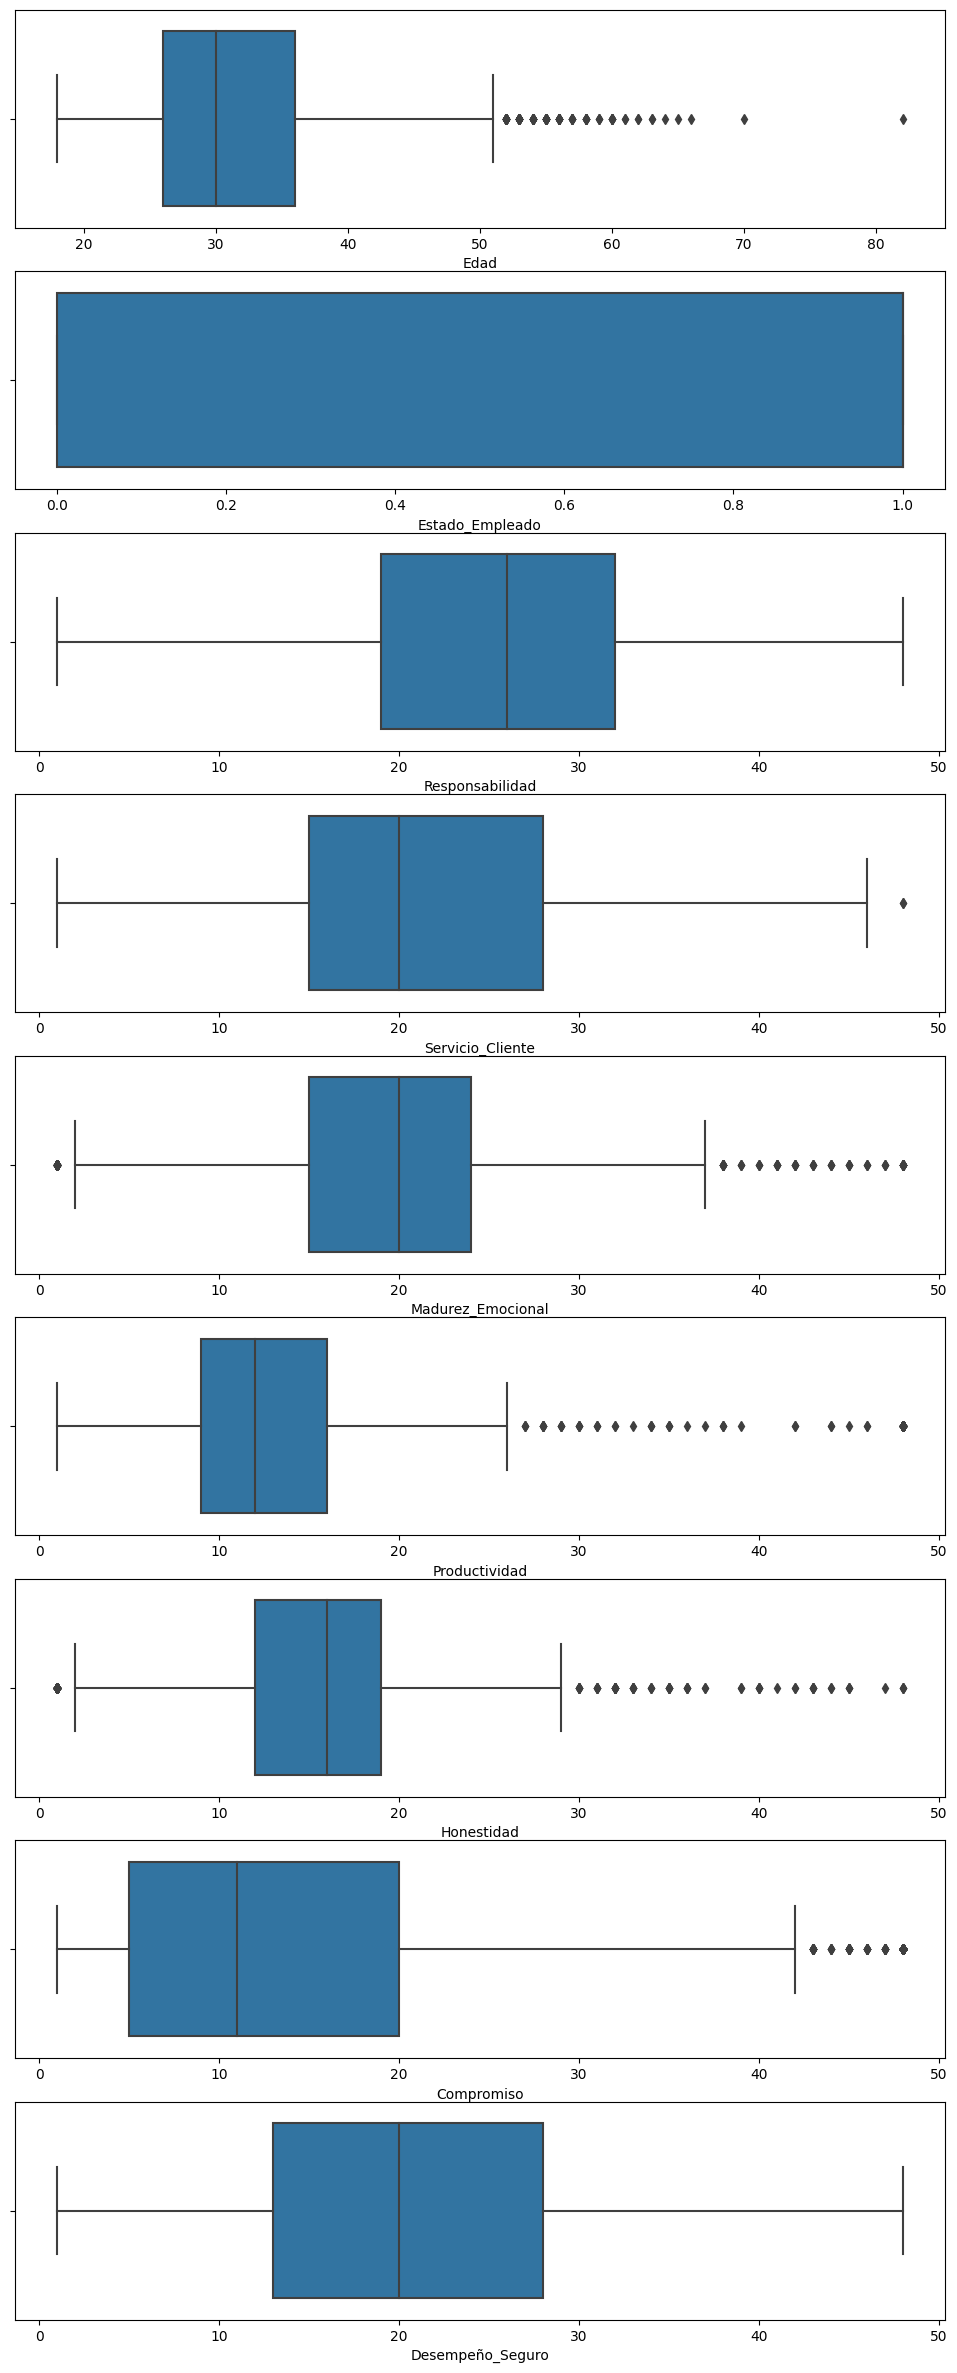

In [31]:
plt.rcParams['figure.figsize'] = (12,30)
fig, axs = plt.subplots(9, 1)

sns.boxplot(ax=axs[0], x=df.Edad)
sns.boxplot(ax=axs[1], x=df.Estado_Empleado)
sns.boxplot(ax=axs[2], x=df.Responsabilidad)
sns.boxplot(ax=axs[3], x=df.Servicio_Cliente)
sns.boxplot(ax=axs[4], x=df.Madurez_Emocional)
sns.boxplot(ax=axs[5], x=df.Productividad)
sns.boxplot(ax=axs[6], x=df.Honestidad)
sns.boxplot(ax=axs[7], x=df.Compromiso)
sns.boxplot(ax=axs[8], x=df.Desempeño_Seguro)

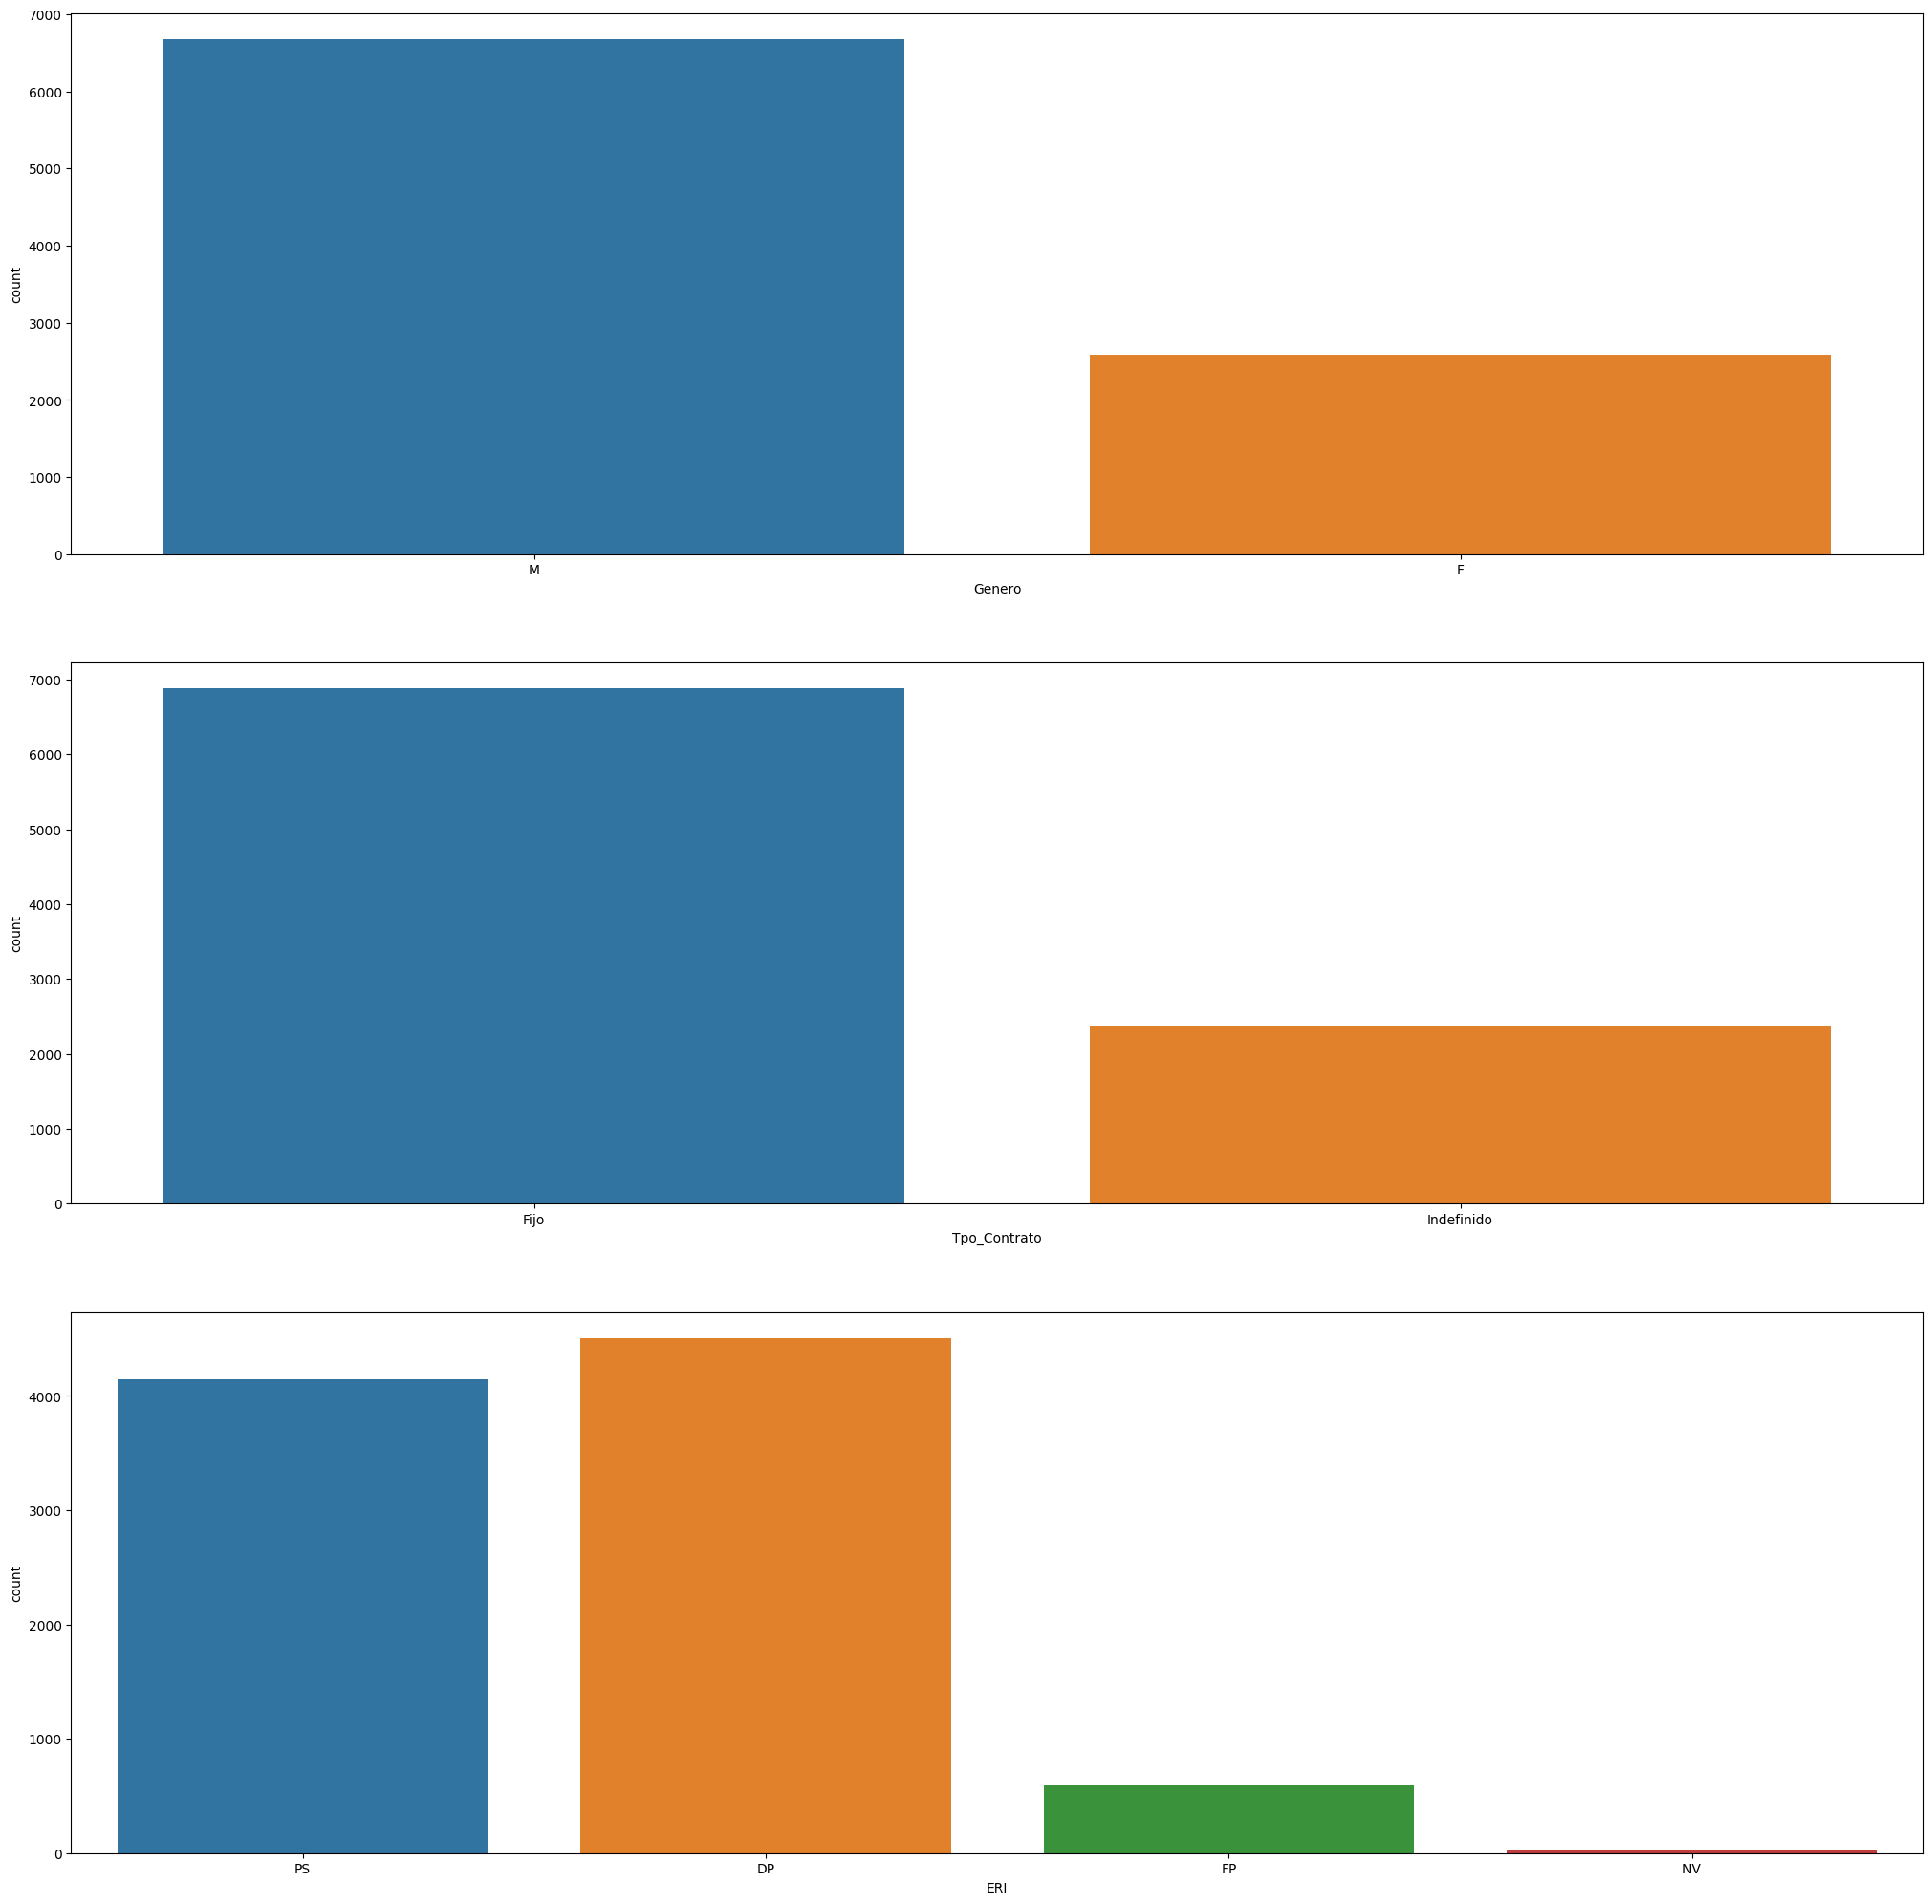

In [32]:
#Graficamos las variables categoricas
plot_multiples_graficas(df,CatColsAct,1,3,'c',None,(25,25))

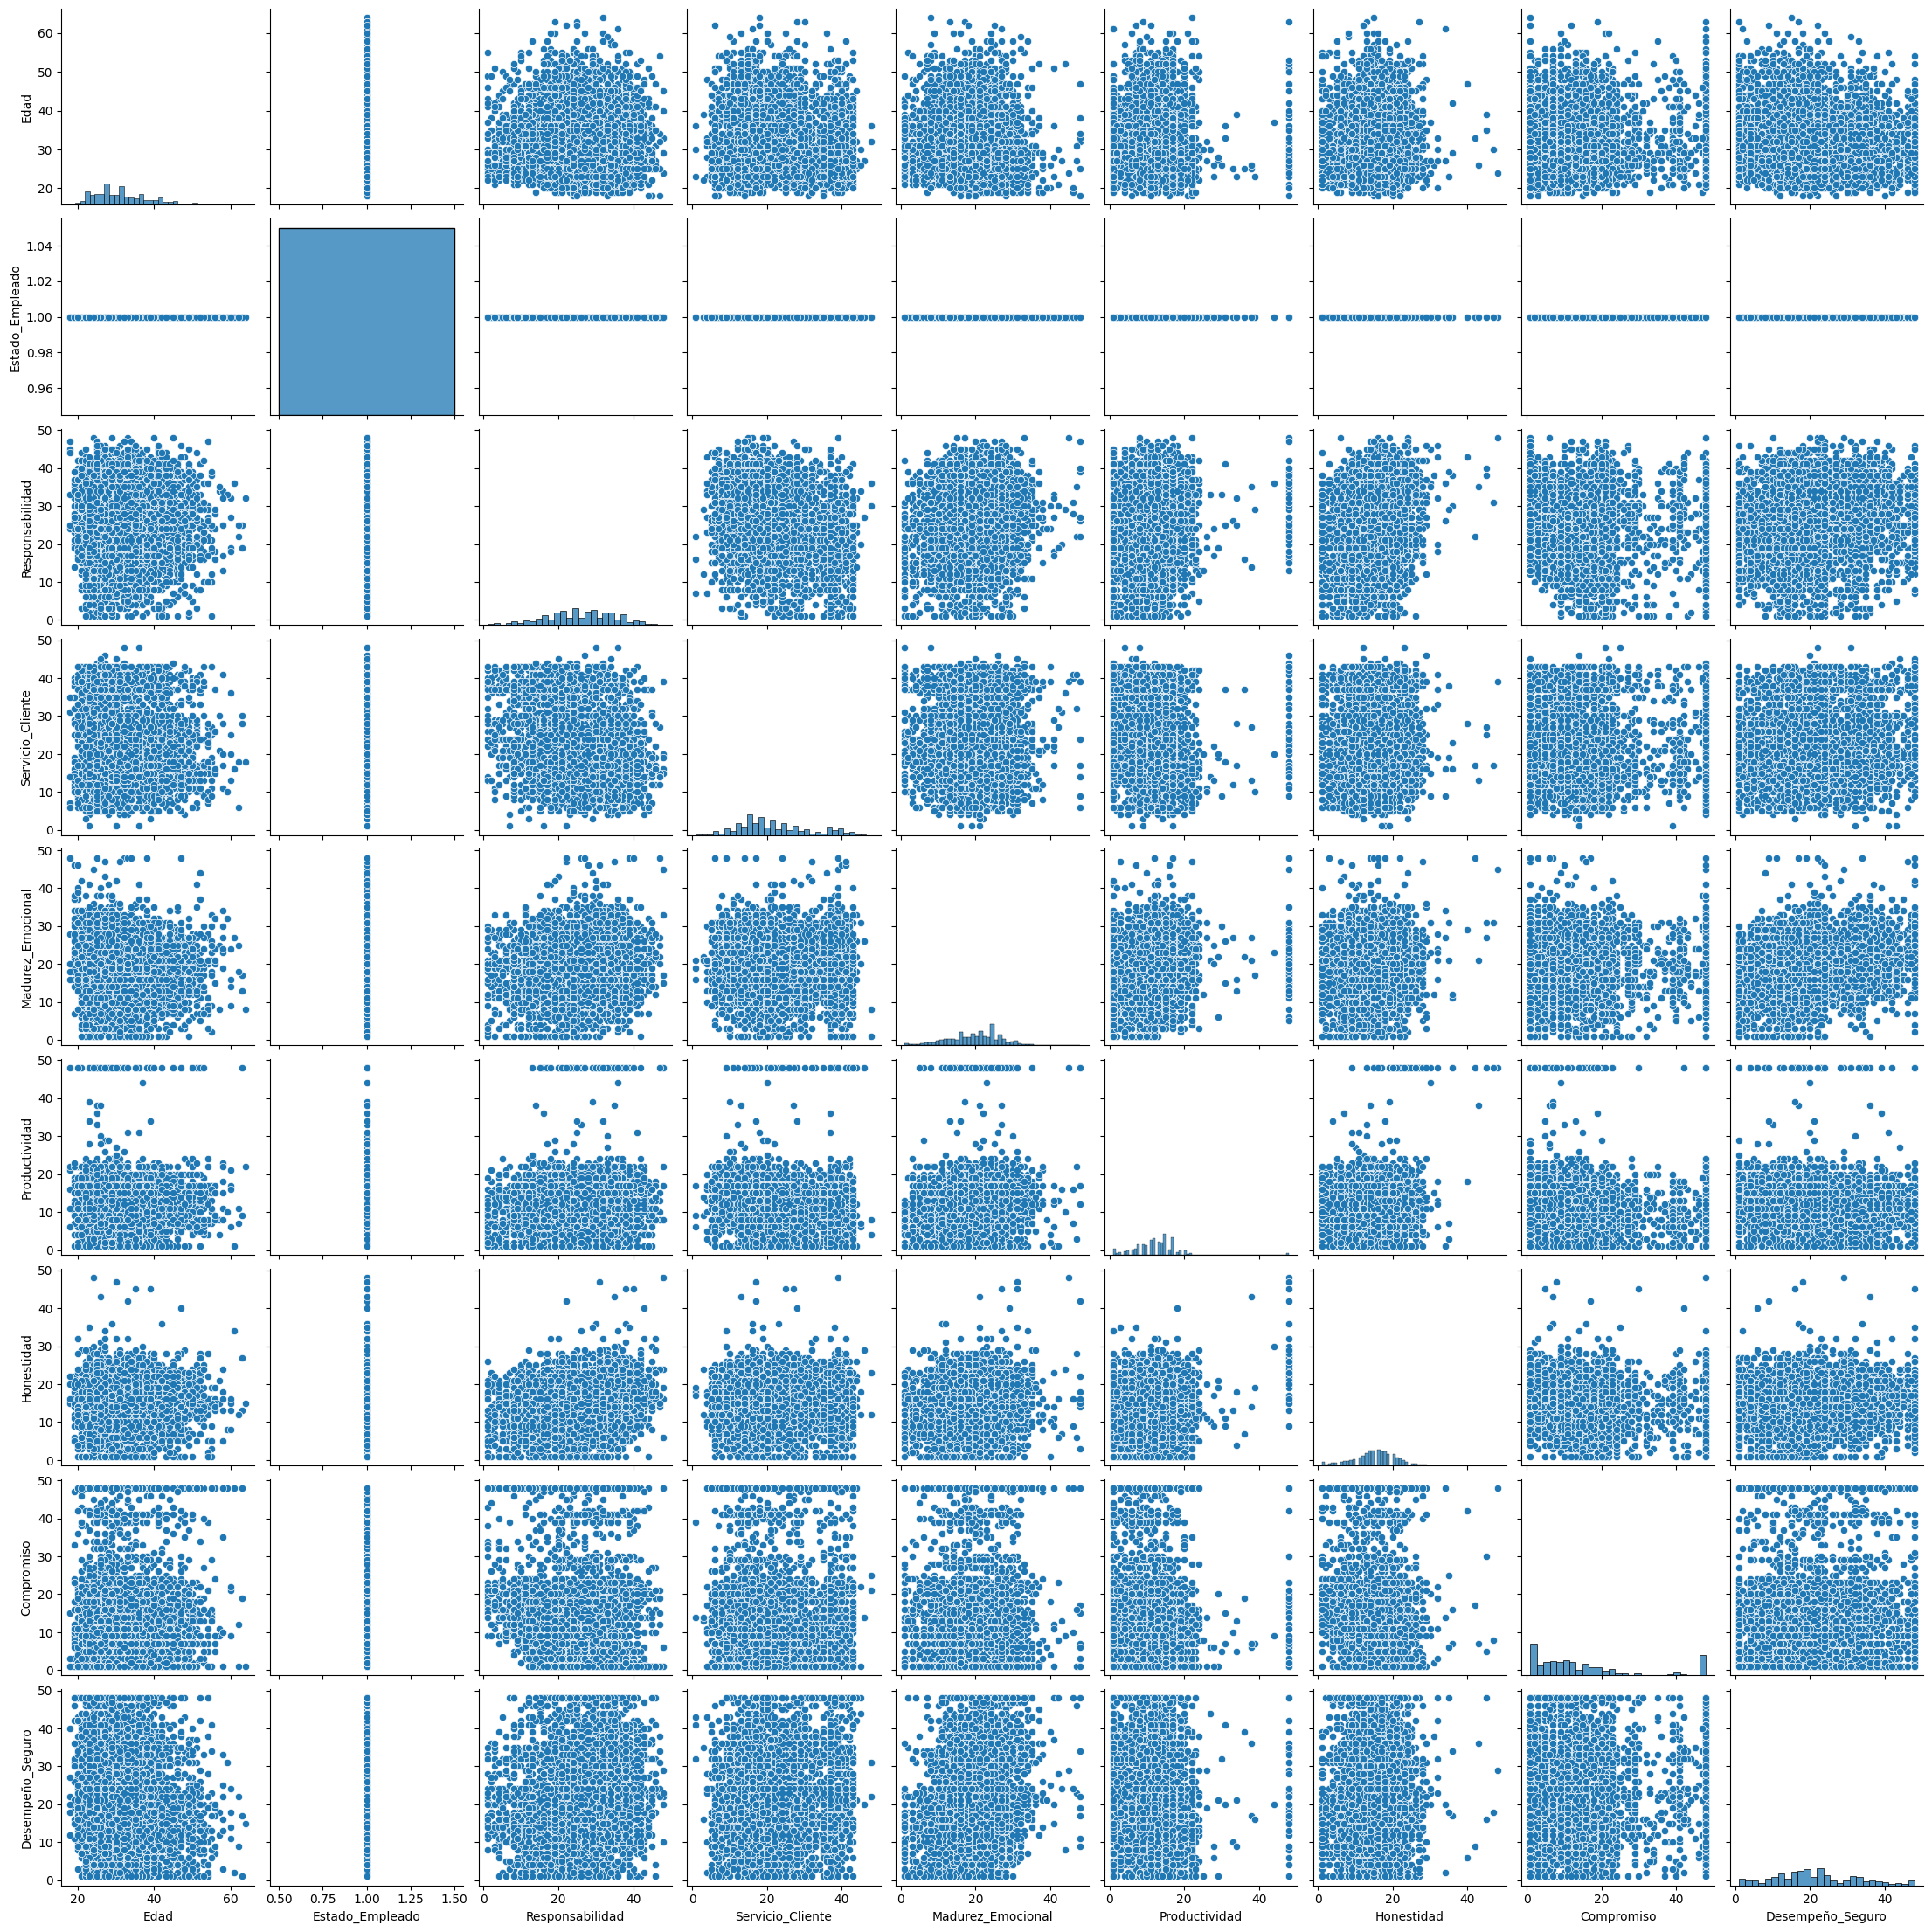

In [33]:
#graficamos las variables Numericas
sns.pairplot(dfActivos[NumColsAct])

## Corvertir a variables dummies

In [34]:
dfdumact =pd.get_dummies(data =df)
dfdumact.head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0    36                0               42                25   
1    37                0               16                11   
2    40                0               33                22   
3    35                0               24                21   
4    42                0               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0                 20             10          23          21                37   
1                 31             14           8           3                15   
2                 21             13          22          20                42   
3                 25             17          21           7                17   
4                 31             48          25          40                23   

   Genero_F  Genero_M  Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  ERI_DP  \
0         0         1                  1                        0       0   
1         0         1                  1                        0       0   
2         0         1                  1                        0       0   
3         0         1                  1                        0       0   
4         1         0                  1                        0       0   

   ERI_FP  ERI_NV  ERI_PS  
0       0       0       1  
1       0       0       1  
2       0       0       1  
3       0       0       1  
4       0       0       1

## Normalización de los datos para el Df

In [35]:
#Reset al index ya que me puso valores diferentes
data_normAct = (dfdumact-dfdumact.min())/(dfdumact.max()-dfdumact.min())
data_normAct = data_normAct.reset_index(drop=True)
data_normAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     9264 non-null   float64
 1   Estado_Empleado          9264 non-null   float64
 2   Responsabilidad          9264 non-null   float64
 3   Servicio_Cliente         9264 non-null   float64
 4   Madurez_Emocional        9264 non-null   float64
 5   Productividad            9264 non-null   float64
 6   Honestidad               9264 non-null   float64
 7   Compromiso               9264 non-null   float64
 8   Desempeño_Seguro         9264 non-null   float64
 9   Genero_F                 9264 non-null   float64
 10  Genero_M                 9264 non-null   float64
 11  Tpo_Contrato_Fijo        9264 non-null   float64
 12  Tpo_Contrato_Indefinido  9264 non-null   float64
 13  ERI_DP                   9264 non-null   float64
 14  ERI_FP                  

## Hallar el número de clusters óptimo

Text(0, 0.5, 'wcss')

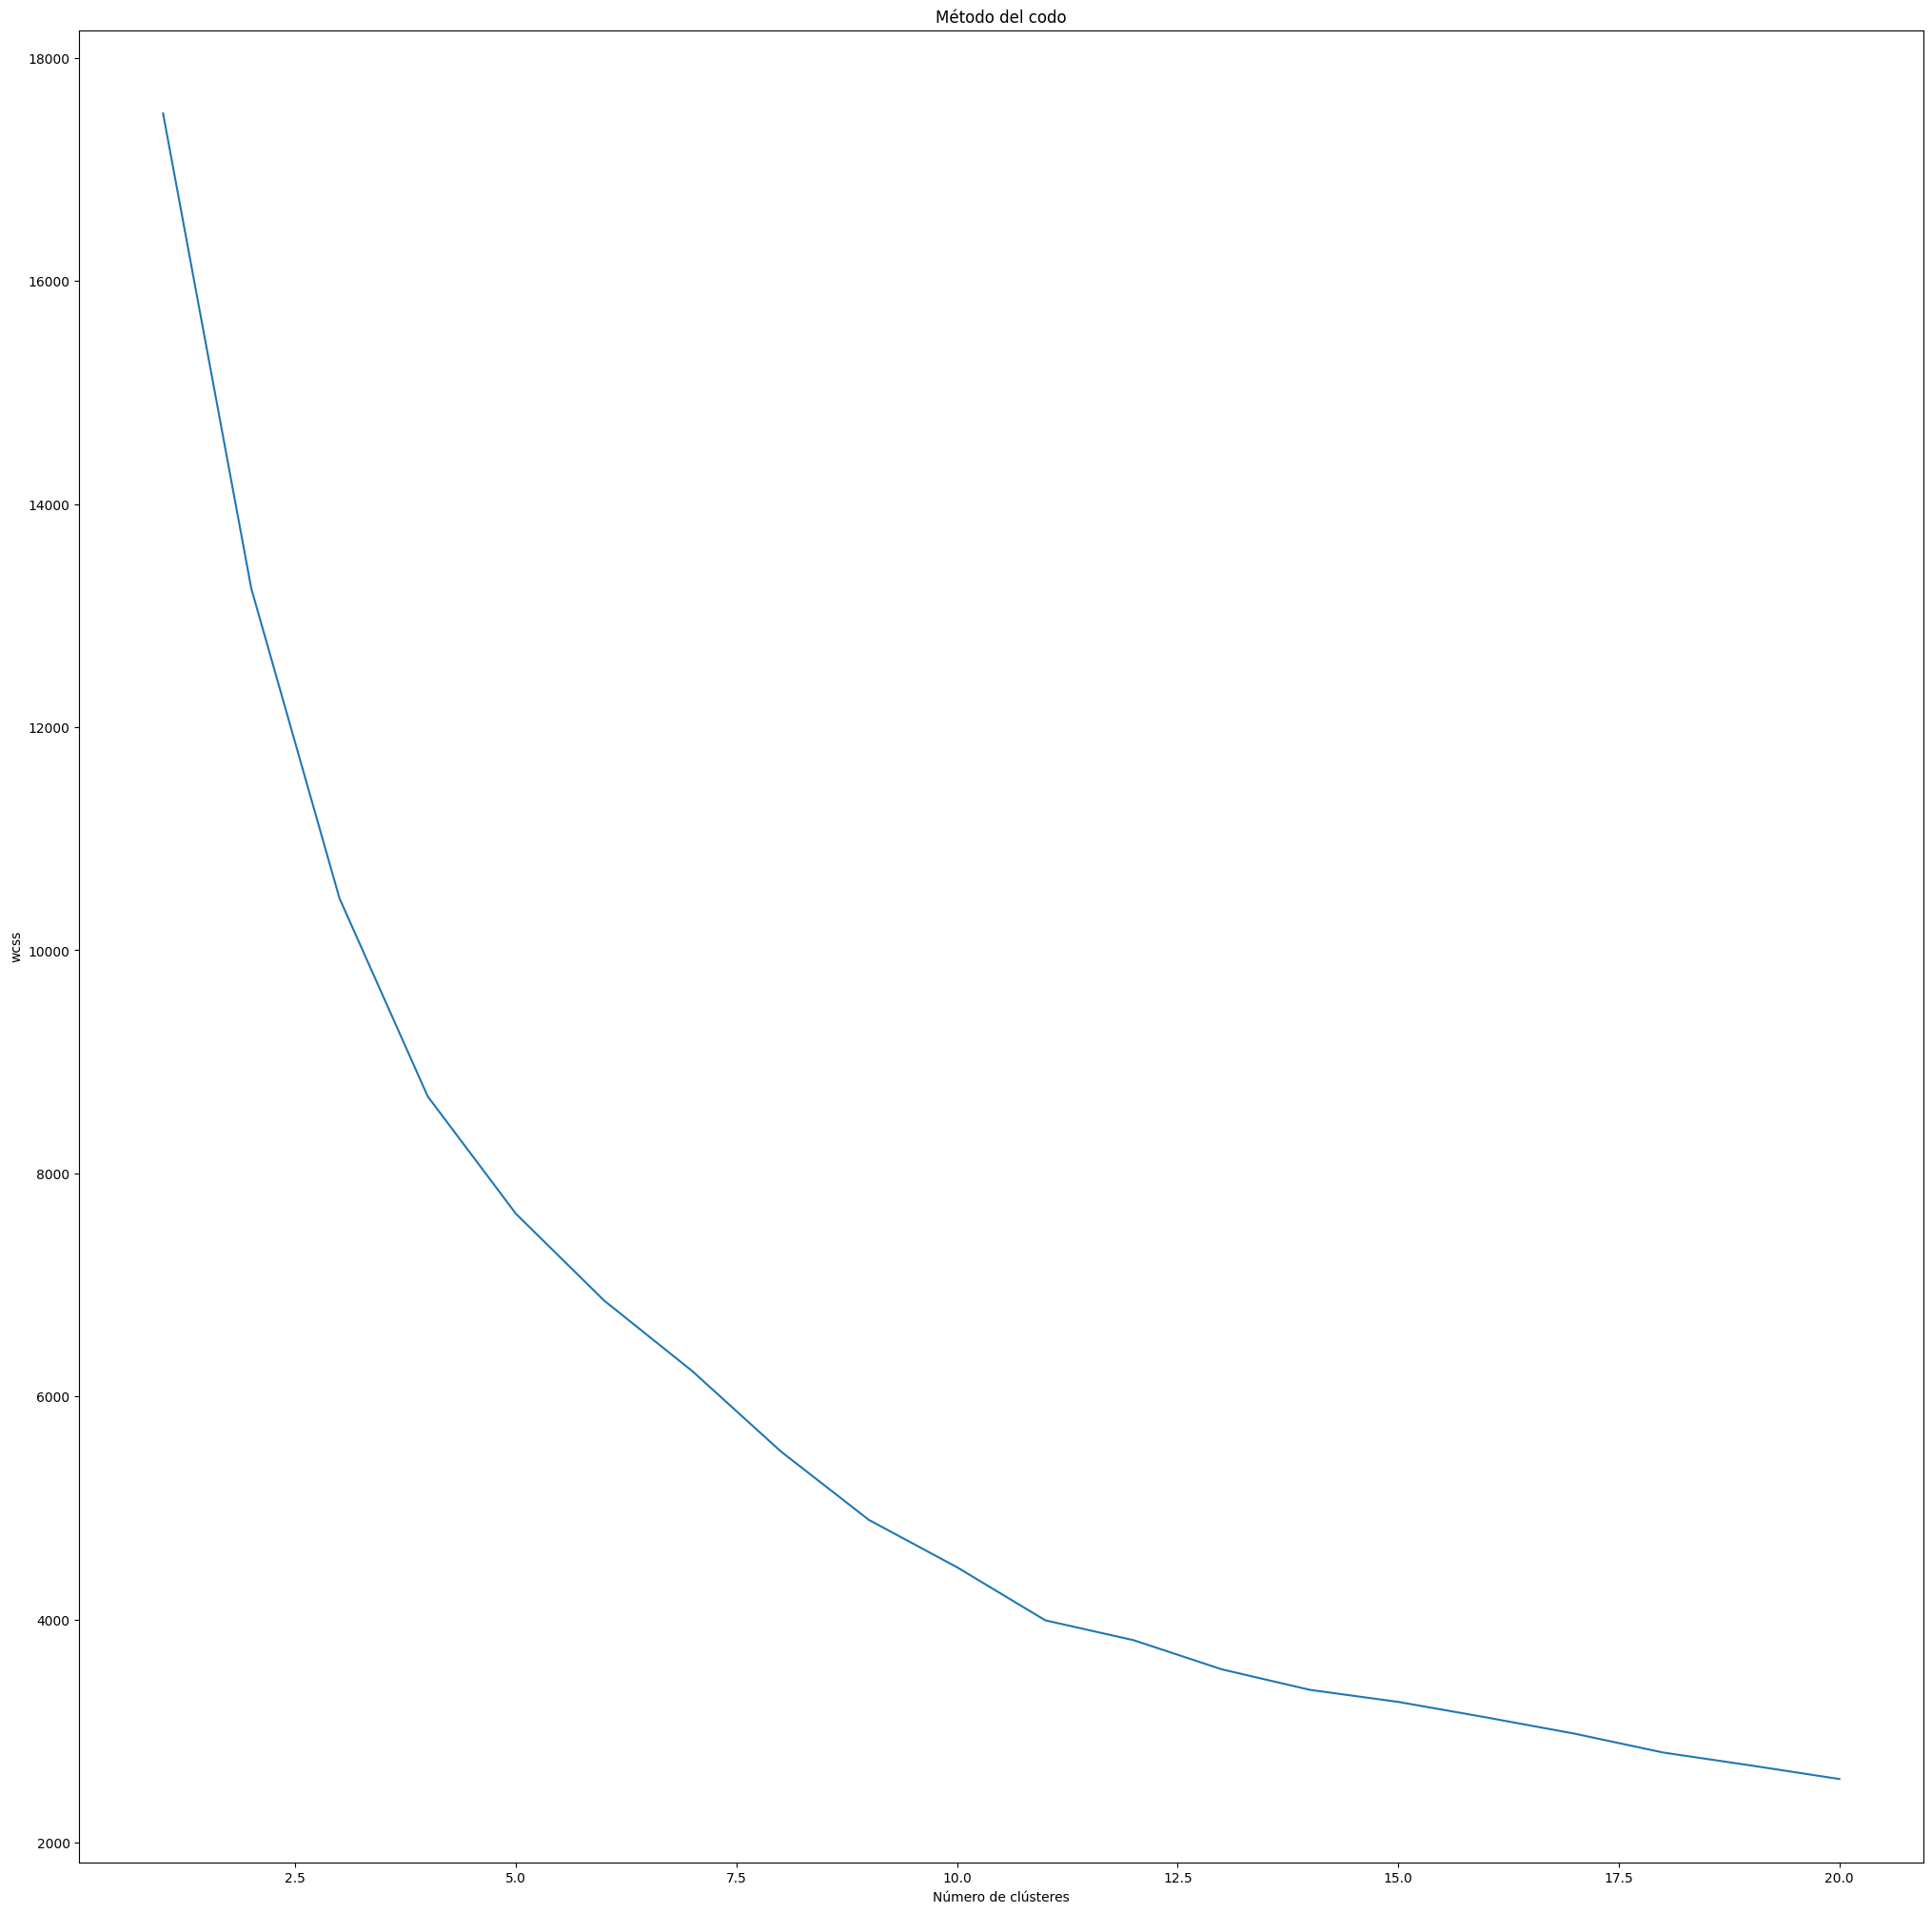

In [36]:
#from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
  kmeans = KMeans(n_clusters=i,max_iter=300,  n_init=10)
  kmeans.fit(data_normAct)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,21),wcss)
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")

Text(0.5, 1.0, 'Índice de Silhouette')

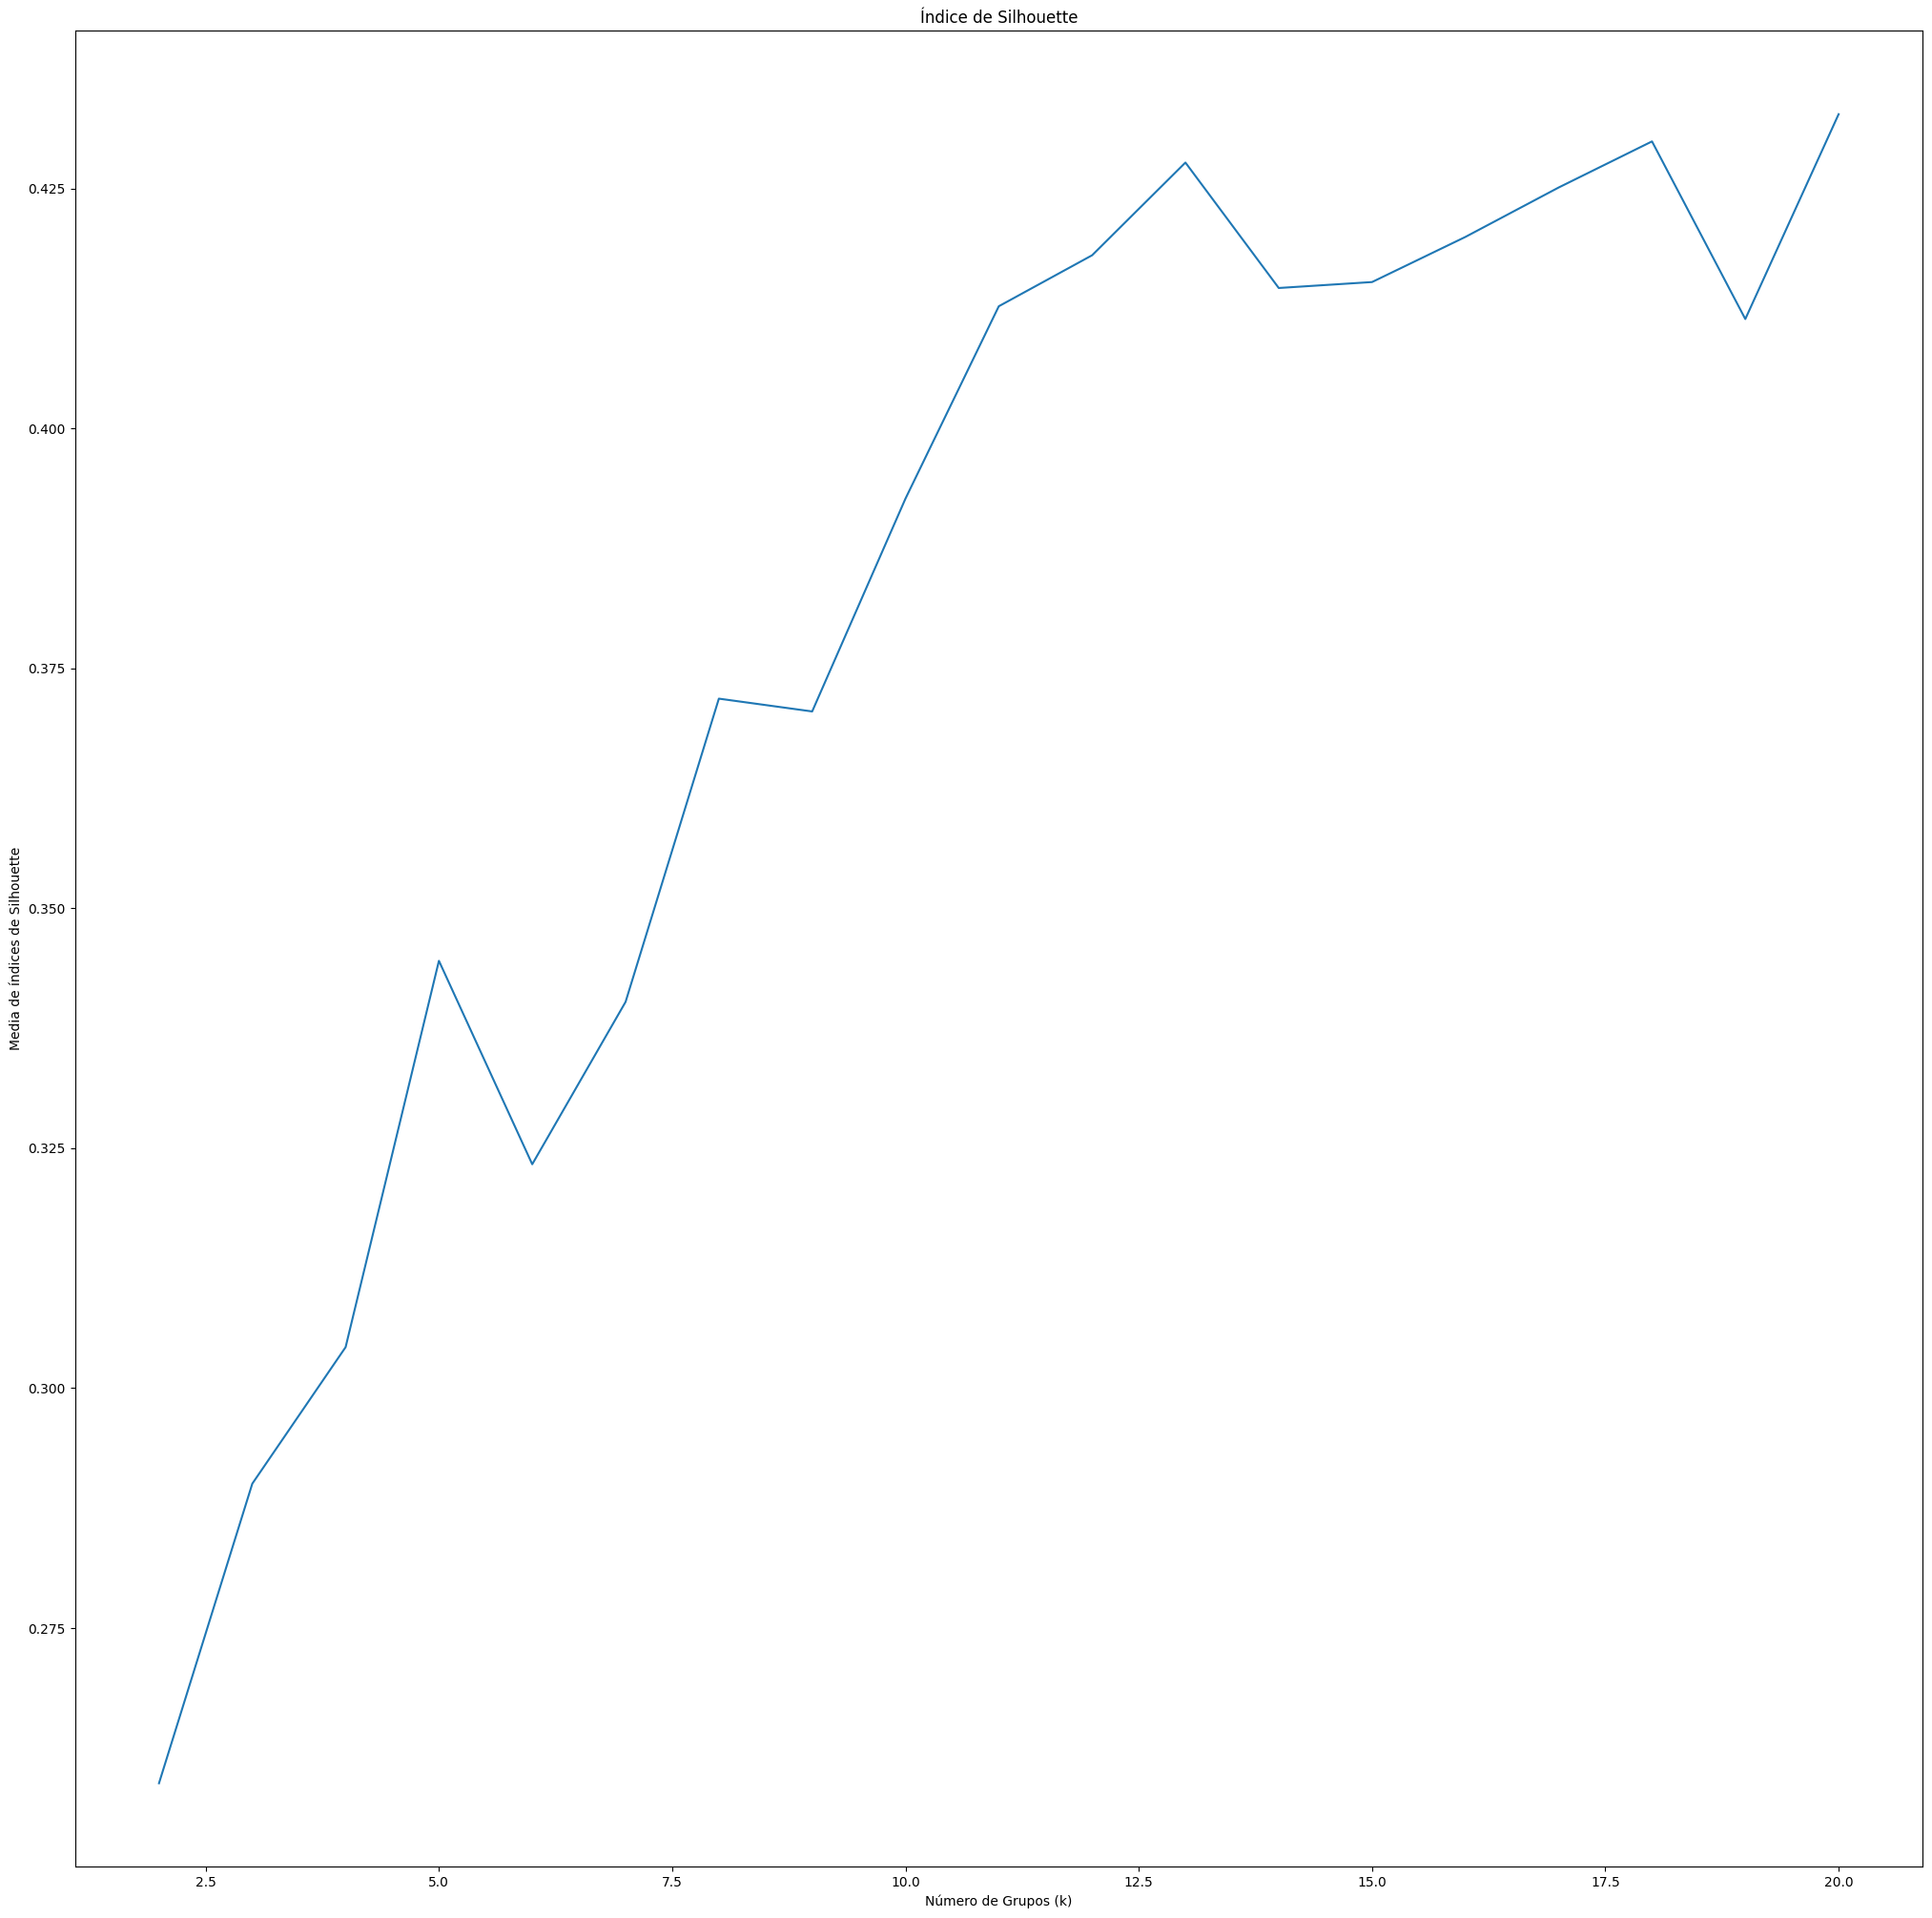

In [37]:
numeroCluster = range(2, 21)
valoresMedios = []

for n_clusters in numeroCluster:
  modeloKmeans = KMeans(n_clusters=n_clusters, n_init=10)
  labels = modeloKmeans.fit_predict(data_normAct)
  mediaSilhouette = silhouette_score(data_normAct, labels)
  valoresMedios.append(mediaSilhouette)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Media de índices de Silhouette')
plt.title('Índice de Silhouette')

## Aplicar el clustering

In [38]:
#Aplicamos clusterin con 8 clusters que 
clustering = KMeans(n_clusters=5, max_iter=300, n_init=10)
clustering.fit(data_normAct)
clustering.cluster_centers_

array([[ 2.27194246e-01,  4.45664105e-01,  4.97022211e-01,
         4.87547781e-01,  4.39015656e-01,  2.56323423e-01,
         3.18962094e-01,  4.49953679e-01,  4.28038707e-01,
        -3.33066907e-16,  1.00000000e+00,  1.00000000e+00,
        -1.11022302e-15,  2.38697950e-15,  9.33040615e-02,
         4.02488108e-03,  9.02671057e-01],
       [ 2.29796426e-01,  4.71051595e-01,  4.66350465e-01,
         4.14738589e-01,  3.37878039e-01,  2.39062120e-01,
         2.79101338e-01,  2.34788365e-01,  3.10400308e-01,
        -4.44089210e-16,  1.00000000e+00,  1.00000000e+00,
        -7.21644966e-16,  1.00000000e+00,  5.55111512e-16,
         8.67361738e-19,  8.88178420e-16],
       [ 2.02993476e-01,  7.07070707e-01,  5.79357404e-01,
         3.89766459e-01,  3.72501612e-01,  2.33290350e-01,
         2.76398739e-01,  1.84558349e-01,  4.52629128e-01,
         3.80471380e-01,  6.19528620e-01, -7.77156117e-16,
         1.00000000e+00,  1.00000000e+00,  4.99600361e-16,
         4.33680869e-19,  1.2

## Agregar a la clasificación original

In [39]:
data_normAct['KMeans_Clusters'] = clustering.labels_
data_normAct

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0     0.281250              0.0         0.872340          0.510638   
1     0.296875              0.0         0.319149          0.212766   
2     0.343750              0.0         0.680851          0.446809   
3     0.265625              0.0         0.489362          0.425532   
4     0.375000              0.0         0.829787          0.468085   
...        ...              ...              ...               ...   
9259  0.062500              1.0         0.446809          0.446809   
9260  0.093750              1.0         0.255319          0.553191   
9261  0.078125              1.0         0.659574          0.574468   
9262  0.078125              1.0         0.170213          0.404255   
9263  0.390625              1.0         0.787234          0.404255   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
0              0.404255       0.191489    0.468085    0.425532   
1              0.638298       0.276596    0.148936    0.042553   
2              0.425532       0.255319    0.446809    0.404255   
3              0.510638       0.340426    0.425532    0.127660   
4              0.638298       1.000000    0.510638    0.829787   
...                 ...            ...         ...         ...   
9259           0.510638       0.276596    0.276596    0.170213   
9260           0.361702       0.042553    0.042553    0.425532   
9261           0.255319       0.702128    0.063830    0.255319   
9262           0.361702       0.212766    0.319149    0.297872   
9263           0.319149       0.297872    0.319149    0.021277   

      Desempeño_Seguro  Genero_F  Genero_M  Tpo_Contrato_Fijo  \
0             0.765957       0.0       1.0                1.0   
1             0.297872       0.0       1.0                1.0   
2             0.872340       0.0       1.0                1.0   
3             0.340426       0.0       1.0                1.0   
4             0.468085       1.0       0.0                1.0   
...                ...       ...       ...                ...   
9259          0.808511       0.0       1.0                1.0   
9260          0.893617       1.0       0.0                1.0   
9261          0.425532       0.0       1.0                0.0   
9262          0.212766       1.0       0.0                1.0   
9263          0.425532       1.0       0.0                1.0   

      Tpo_Contrato_Indefinido  ERI_DP  ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0                         0.0     0.0     0.0     0.0     1.0                0  
1                         0.0     0.0     0.0     0.0     1.0                0  
2                         0.0     0.0     0.0     0.0     1.0                0  
3                         0.0     0.0     0.0     0.0     1.0                0  
4                         0.0     0.0     0.0     0.0     1.0                3  
...                       ...     ...     ...     ...     ...              ...  
9259                      0.0     1.0     0.0     0.0     0.0                1  
9260                      0.0     1.0     0.0     0.0     0.0                3  
9261                      1.0     0.0     1.0     0.0     0.0                4  
9262                      0.0     1.0     0.0     0.0     0.0                3  
9263                      0.0     1.0     0.0     0.0     0.0                3  

[9264 rows x 18 columns]

In [40]:
data_normAct = data_normAct.dropna()
data_normAct.head()

Edad  Estado_Empleado  Responsabilidad  Servicio_Cliente  \
0  0.281250              0.0         0.872340          0.510638   
1  0.296875              0.0         0.319149          0.212766   
2  0.343750              0.0         0.680851          0.446809   
3  0.265625              0.0         0.489362          0.425532   
4  0.375000              0.0         0.829787          0.468085   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.404255       0.191489    0.468085    0.425532          0.765957   
1           0.638298       0.276596    0.148936    0.042553          0.297872   
2           0.425532       0.255319    0.446809    0.404255          0.872340   
3           0.510638       0.340426    0.425532    0.127660          0.340426   
4           0.638298       1.000000    0.510638    0.829787          0.468085   

   Genero_F  Genero_M  Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  ERI_DP  \
0       0.0       1.0                1.0                      0.0     0.0   
1       0.0       1.0                1.0                      0.0     0.0   
2       0.0       1.0                1.0                      0.0     0.0   
3       0.0       1.0                1.0                      0.0     0.0   
4       1.0       0.0                1.0                      0.0     0.0   

   ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0     0.0     0.0     1.0                0  
1     0.0     0.0     1.0                0  
2     0.0     0.0     1.0                0  
3     0.0     0.0     1.0                0  
4     0.0     0.0     1.0                3

## Visualización

In [41]:
pca = PCA(n_components=2)#Quiero un grafico de 2 dimenciones con el modelo pca
pca_data=pca.fit_transform(data_normAct)#Aplico fit del modelo pca
pca_data_df= pd.DataFrame(data=pca_data, columns=['Componente1', 'Componente2'])#Creo un df con los valores de las 2 componentes principales
pca_add = pd.concat([pca_data_df, data_normAct['KMeans_Clusters']], axis=1)#indico los 2 objetos a concatenar y axis=1 para indicar que son columnas
pca_add.head()

Componente1  Componente2  KMeans_Clusters
0    -1.676330     0.750541                0
1    -1.695415     0.633250                0
2    -1.678273     0.749539                0
3    -1.691572     0.664015                0
4     1.459289     0.955197                3

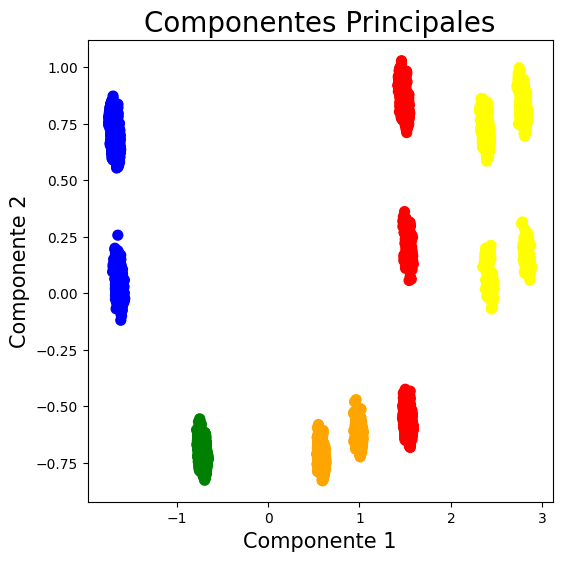

In [42]:
fig = plt.figure(figsize=(6,6))#Creamos figura de tamaño 6*6 y se guarda en fig

ax = fig.add_subplot(1,1,1)#creo solo 1 grafico dentro de la figura y lo guardo en ax
ax.set_xlabel('Componente 1', fontsize = 15)#Nombres de ejes 
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)#Nombre de grafico

color_theme = np.array(["blue","green", "orange","red","yellow"])#Creo un array para guardar los colores y lo guardo en color_theme
ax.scatter(x = pca_add.Componente1, y = pca_add.Componente2, #Dibujo los puntos que representan a los vino por scatter x = componente1 y y= componente 2
            c= color_theme[pca_add.KMeans_Clusters], s=50) #utilizo el parametro c para los colores de los puntos  s= tamaño de lso puntos a graficar
plt.show()